# Important Packages:

In [116]:
import nltk
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests
import urllib
from nltk.corpus import PlaintextCorpusReader
import pandas as pd
import urllib.request
import string
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.metrics import silhouette_samples,silhouette_score
from array import *
from nltk.probability import FreqDist
import squarify
from itertools import chain
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import random
import pickle
from yellowbrick.cluster import KElbowVisualizer
import pysentiment2 as ps
from nrclex import NRCLex
from nltk.corpus import sentiwordnet as swn
from nltk import pos_tag
from nltk import map_tag
import ssl
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# URL Collection:

In [117]:
rbi_mpc_url = ['https://rbi.org.in/Scripts/PublicationsView.aspx?id=18941',
               'https://rbi.org.in/Scripts/BS_PressReleaseDisplay.aspx?prid=46724',
               'https://rbi.org.in/Scripts/BS_PressReleaseDisplay.aspx?prid=46722',
               'https://rbi.org.in/scripts/bs_viewcontent.aspx?Id=3659',
               'https://rbi.org.in/scripts/bs_viewcontent.aspx?Id=3660',
               'https://rbi.org.in/scripts/bs_viewcontent.aspx?Id=3661',
               'https://rbi.org.in/scripts/bs_viewcontent.aspx?Id=3662',
               'https://www.rbi.org.in/Scripts/BS_PressReleaseDisplay.aspx?prid=46838',
               'https://rbi.org.in/Scripts/BS_PressReleaseDisplay.aspx?prid=47226',
               'https://rbi.org.in/Scripts/BS_PressReleaseDisplay.aspx?prid=47225',
               'https://rbi.org.in/scripts/bs_viewcontent.aspx?Id=3717',
               'https://rbi.org.in/scripts/bs_viewcontent.aspx?Id=3719',
               'https://rbi.org.in/scripts/bs_viewcontent.aspx?Id=3721',
               'https://www.rbi.org.in/Scripts/BS_PressReleaseDisplay.aspx?prid=47359',
               'https://rbi.org.in/Scripts/BS_PressReleaseDisplay.aspx?prid=47819',
               'https://rbi.org.in/Scripts/BS_PressReleaseDisplay.aspx?prid=47818',
               'https://www.rbi.org.in/scripts/bs_viewcontent.aspx?Id=3751',
               'https://www.rbi.org.in/scripts/bs_viewcontent.aspx?Id=3752',
               'https://www.rbi.org.in/scripts/bs_viewcontent.aspx?Id=3754',
               'https://www.rbi.org.in/Scripts/BS_PressReleaseDisplay.aspx?prid=47941',
               'https://www.rbi.org.in/Scripts/PublicationsView.aspx?id=19331',
               'https://rbi.org.in/Scripts/BS_PressReleaseDisplay.aspx?prid=48318',
               'https://rbi.org.in/Scripts/BS_PressReleaseDisplay.aspx?prid=48319',
               'https://www.rbi.org.in/scripts/bs_viewcontent.aspx?Id=3769',
               'https://www.rbi.org.in/scripts/bs_viewcontent.aspx?Id=3770',
               'https://www.rbi.org.in/scripts/bs_viewcontent.aspx?Id=3771',
               'https://www.rbi.org.in/Scripts/BS_PressReleaseDisplay.aspx?prid=48440',
               'https://rbi.org.in/Scripts/BS_PressReleaseDisplay.aspx?prid=48803',
               'https://rbi.org.in/Scripts/BS_PressReleaseDisplay.aspx?prid=48802',
               'https://www.rbi.org.in/scripts/bs_viewcontent.aspx?Id=3796',
               'https://www.rbi.org.in/scripts/bs_viewcontent.aspx?Id=3798',
               'https://www.rbi.org.in/scripts/bs_viewcontent.aspx?Id=3799',
               'https://www.rbi.org.in/Scripts/BS_PressReleaseDisplay.aspx?prid=48916',
               'https://rbi.org.in/Scripts/BS_PressReleaseDisplay.aspx?prid=49343',
               'https://rbi.org.in/Scripts/BS_PressReleaseDisplay.aspx?prid=49342',
               'https://www.rbi.org.in/scripts/bs_viewcontent.aspx?Id=3828',
               'https://www.rbi.org.in/scripts/bs_viewcontent.aspx?Id=3831',
               'https://www.rbi.org.in/Scripts/BS_PressReleaseDisplay.aspx?prid=49424',
               'https://www.rbi.org.in/Scripts/BS_PressReleaseDisplay.aspx?prid=49582',
               'https://www.rbi.org.in/Scripts/BS_PressReleaseDisplay.aspx?prid=49581',
               'https://www.rbi.org.in/scripts/bs_viewcontent.aspx?Id=3847',
               'https://www.rbi.org.in/Scripts/PublicationsView.aspx?id=19439',
               'https://www.rbi.org.in/Scripts/BS_PressReleaseDisplay.aspx?prid=49659',
               'https://www.rbi.org.in/Scripts/bs_viewcontent.aspx?Id=3853',
               'https://www.rbi.org.in/Scripts/BS_PressReleaseDisplay.aspx?prid=49844',
               'https://www.rbi.org.in/Scripts/BS_PressReleaseDisplay.aspx?prid=49843',
               'https://www.rbi.org.in/Scripts/bs_viewcontent.aspx?Id=3859',
               'https://www.rbi.org.in/Scripts/BS_PressReleaseDisplay.aspx?prid=49909',
               'https://www.rbi.org.in/Scripts/BS_PressReleaseDisplay.aspx?prid=50176',
               'https://www.rbi.org.in/Scripts/BS_PressReleaseDisplay.aspx?prid=50175',
               'https://www.rbi.org.in/Scripts/BS_PressReleaseDisplay.aspx?prid=50174',
               'https://www.rbi.org.in/Scripts/BS_PressReleaseDisplay.aspx?prid=50240',
               'https://www.rbi.org.in/Scripts/BS_PressReleaseDisplay.aspx?prid=50426',
               'https://www.rbi.org.in/Scripts/BS_PressReleaseDisplay.aspx?prid=50463',
               'https://www.rbi.org.in/Scripts/PublicationsView.aspx?id=19980',
               'https://www.rbi.org.in/Scripts/BS_PressReleaseDisplay.aspx?prid=50480',
               'https://www.rbi.org.in/Scripts/BS_PressReleaseDisplay.aspx?prid=50479',
               'https://www.rbi.org.in/Scripts/bs_viewcontent.aspx?Id=3912',
               'https://www.rbi.org.in/Scripts/BS_PressReleaseDisplay.aspx?prid=50560',
               'https://www.rbi.org.in/Scripts/BS_PressReleaseDisplay.aspx?prid=50748',
               'https://www.rbi.org.in/Scripts/BS_PressReleaseDisplay.aspx?prid=50747',
               'https://www.rbi.org.in/Scripts/BS_PressReleaseDisplay.aspx?prid=50746',
               'https://www.rbi.org.in/scripts/bs_viewcontent.aspx?Id=3937',
               'https://www.rbi.org.in/Scripts/BS_PressReleaseDisplay.aspx?prid=50831',
               'https://www.rbi.org.in/Scripts/BS_PressReleaseDisplay.aspx?prid=51078',
               'https://www.rbi.org.in/Scripts/BS_PressReleaseDisplay.aspx?prid=51077',
               'https://www.rbi.org.in/Scripts/BS_PressReleaseDisplay.aspx?prid=51076',
               'https://www.rbi.org.in/scripts/bs_viewcontent.aspx?Id=3948',
               'https://www.rbi.org.in/Scripts/BS_PressReleaseDisplay.aspx?prid=51161',
               'https://rbi.org.in/Scripts/PublicationsView.aspx?id=20350',
               'https://rbi.org.in/Scripts/BS_PressReleaseDisplay.aspx?prid=51382',
               'https://rbi.org.in/Scripts/BS_PressReleaseDisplay.aspx?prid=51381',
               'https://rbi.org.in/Scripts/BS_PressReleaseDisplay.aspx?prid=51380',
               'https://www.rbi.org.in/scripts/bs_viewcontent.aspx?Id=3985',
               'https://www.rbi.org.in/Scripts/BS_PressReleaseDisplay.aspx?prid=51456',
               'https://rbi.org.in/Scripts/BS_PressReleaseDisplay.aspx?prid=51526',
               'https://rbi.org.in/Scripts/BS_PressReleaseDisplay.aspx?prid=51684',
               'https://rbi.org.in/Scripts/BS_PressReleaseDisplay.aspx?prid=51683',
               'https://rbi.org.in/Scripts/BS_PressReleaseDisplay.aspx?prid=51682',
               'https://www.rbi.org.in/scripts/bs_viewcontent.aspx?Id=3995',
               'https://rbi.org.in/Scripts/BS_PressReleaseDisplay.aspx?prid=51754',
               'https://rbi.org.in/Scripts/BS_PressReleaseDisplay.aspx?prid=52010',
               'https://rbi.org.in/Scripts/BS_PressReleaseDisplay.aspx?prid=52011',
               'https://rbi.org.in/Scripts/BS_PressReleaseDisplay.aspx?prid=52008',
               'https://www.rbi.org.in/scripts/bs_viewcontent.aspx?Id=4025',
               'https://rbi.org.in/Scripts/BS_PressReleaseDisplay.aspx?prid=52088',
               'https://www.rbi.org.in/Scripts/PublicationsView.aspx?id=20647',
               'https://rbi.org.in/Scripts/BS_PressReleaseDisplay.aspx?prid=52368',
               'https://rbi.org.in/Scripts/BS_PressReleaseDisplay.aspx?prid=52366',
               'https://www.rbi.org.in/Scripts/BS_PressReleaseDisplay.aspx?prid=52367',
               'https://www.rbi.org.in/scripts/bs_viewcontent.aspx?Id=4050',
               'https://www.rbi.org.in/Scripts/BS_PressReleaseDisplay.aspx?prid=52450']

# Dataframe Initialization:

In [118]:
rbi_mpc = pd.DataFrame()
rbi_mpc['urls'] = rbi_mpc_url
rbi_mpc['content'] = "will be filled"

# RBI MPC Scraping (April 2019 - till date):

In [119]:
content=[]
for i in range(0,len(rbi_mpc_url),1):
    weburl  = urllib.request.urlopen(rbi_mpc_url[i])
    htmlparse = BeautifulSoup(weburl.read(), 'html.parser')
    for para in htmlparse.find_all("td"):
        raw = para.get_text()
        content.append(raw)
    rbi_mpc.at[i,"content"] = content
    content = []

# Date Extraction:

In [120]:
rbi_mpc['date'] = "will be filled"
for i in range(0,len(rbi_mpc),1):
    if len(rbi_mpc['content'][i][1]) == 20:
        rbi_mpc.loc[i,'date'] = rbi_mpc['content'][i][1]
    else:
        rbi_mpc.loc[i,'date'] = 'NA'

In [121]:
rbi_mpc.iloc[3,2] = 'Date : Apr 04, 2019'
rbi_mpc.iloc[4,2] = 'Date : Apr 04, 2019'
rbi_mpc.iloc[5,2] = 'Date : Apr 05, 2019'
rbi_mpc.iloc[6,2] = 'Date : Apr 06, 2019'
rbi_mpc.iloc[10,2] = 'Date : Jun 06, 2019'
rbi_mpc.iloc[11,2] = 'Date : Jun 08, 2019'
rbi_mpc.iloc[12,2] = 'Date : Jun 12, 2019'
rbi_mpc.iloc[16,2] = 'Date : Aug 07, 2019'
rbi_mpc.iloc[17,2] = 'Date : Aug 08, 2019'
rbi_mpc.iloc[18,2] = 'Date : Aug 09, 2019'
rbi_mpc.iloc[23,2] = 'Date : Oct 04, 2019'
rbi_mpc.iloc[24,2] = 'Date : Oct 06, 2019'
rbi_mpc.iloc[25,2] = 'Date : Oct 06, 2019'
rbi_mpc.iloc[29,2] = 'Date : Dec 05, 2019'
rbi_mpc.iloc[30,2] = 'Date : Dec 05, 2019'
rbi_mpc.iloc[31,2] = 'Date : Dec 09, 2019'
rbi_mpc.iloc[35,2] = 'Date : Feb 06, 2020'
rbi_mpc.iloc[36,2] = 'Date : Feb 07, 2020'
rbi_mpc.iloc[40,2] = 'Date : Mar 27, 2020'
rbi_mpc.iloc[43,2] = 'Date : Apr 17, 2020'
rbi_mpc.iloc[46,2] = 'Date : May 22, 2020'
rbi_mpc.iloc[57,2] = 'Date : Oct 09, 2020'
rbi_mpc.iloc[62,2] = 'Date : Dec 05, 2020'
rbi_mpc.iloc[67,2] = 'Date : Feb 06, 2021'
rbi_mpc.iloc[73,2] = 'Date : Apr 08, 2021'
rbi_mpc.iloc[79,2] = 'Date : Jun 05, 2021'
rbi_mpc.iloc[84,2] = 'Date : Aug 09, 2021'
rbi_mpc.iloc[90,2] = 'Date : Oct 11, 2021'

In [122]:
def stp(text):
    word = text.strip()
    return word
rbi_mpc['date'] = rbi_mpc['date'].apply(lambda x: stp(x))

# Title Extraction:

In [123]:
rbi_mpc['title'] = "will be filled"

for i in range(0,len(rbi_mpc),1):
    
    if len(rbi_mpc['content'][i][1]) == 20:
        
        rbi_mpc.loc[i,'title'] = rbi_mpc['content'][i][2]
        
    else:
        
        rbi_mpc.loc[i,'title'] = 'NA'

# Relevant Content Extraction:

In [124]:
rbi_mpc['updated_content'] = "will be filled"
for i in range(0,len(rbi_mpc),1):
    if len(rbi_mpc['content'][i][1]) == 20:
        rbi_mpc.loc[i,'updated_content'] = rbi_mpc["content"][i][3:4:1]
    else:
        rbi_mpc.loc[i,'updated_content'] = rbi_mpc["content"][i][1:2:1]

# Date Column Cleaning:

In [125]:
def clean_date(text):
    text_clean = text.replace('Date :', '')
    return text_clean

rbi_mpc['date'] = rbi_mpc['date'].apply(lambda x: clean_date(x))

# Content Cleaning:

In [126]:
def clean(text):
    # text_clean = ' '.join(text)
    text_clean = text
    text_clean = text_clean.replace('\xa0', ' ')
    text_clean = text_clean.replace('\r', ' ')
    text_clean = text_clean.replace('\n', ' ')
    return text_clean

rbi_mpc['content_clean'] = rbi_mpc['updated_content'].apply(lambda x: clean(x))

rbi_mpc.head()

urls  \
0  https://rbi.org.in/Scripts/PublicationsView.as...   
1  https://rbi.org.in/Scripts/BS_PressReleaseDisp...   
2  https://rbi.org.in/Scripts/BS_PressReleaseDisp...   
3  https://rbi.org.in/scripts/bs_viewcontent.aspx...   
4  https://rbi.org.in/scripts/bs_viewcontent.aspx...   

                                             content           date  \
0  [ (14459 kb),  Date : Apr 04, 2019, Monetary P...   Apr 04, 2019   
1  [ (245 kb),  Date : Apr 04, 2019, Statement on...   Apr 04, 2019   
2  [ (558 kb),  Date : Apr 04, 2019, First Bi-mon...   Apr 04, 2019   
3  [ (98 kb),   Hon’ble Supreme Court has held th...   Apr 04, 2019   
4  [ (134 kb),   The Monetary Policy Committee (M...   Apr 04, 2019   

                                               title  \
0                Monetary Policy Report – April 2019   
1  Statement on Developmental and Regulatory Poli...   
2  First Bi-monthly Monetary Policy Statement, 20...   
3                                                 NA   
4                                                 NA   

                                     updated_content  \
0      Contents   Chapter I: Macroeconomic Outloo...   
1    This Statement sets out various developmenta...   
2    On the basis of an assessment of the current...   
3    Hon’ble Supreme Court has held the RBI circu...   
4    The Monetary Policy Committee (MPC) reviewed...   

                                       content_clean  
0      Contents   Chapter I: Macroeconomic Outloo...  
1    This Statement sets out various developmenta...  
2    On the basis of an assessment of the current...  
3    Hon’ble Supreme Court has held the RBI circu...  
4    The Monetary Policy Committee (MPC) reviewed...

# Punctuation Cleaning:

In [127]:
def remove_punct(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

rbi_mpc['content_clean'] = rbi_mpc['content_clean'].apply(lambda x: remove_punct(x))

rbi_mpc.head(2)

urls  \
0  https://rbi.org.in/Scripts/PublicationsView.as...   
1  https://rbi.org.in/Scripts/BS_PressReleaseDisp...   

                                             content           date  \
0  [ (14459 kb),  Date : Apr 04, 2019, Monetary P...   Apr 04, 2019   
1  [ (245 kb),  Date : Apr 04, 2019, Statement on...   Apr 04, 2019   

                                               title  \
0                Monetary Policy Report – April 2019   
1  Statement on Developmental and Regulatory Poli...   

                                     updated_content  \
0      Contents   Chapter I: Macroeconomic Outloo...   
1    This Statement sets out various developmenta...   

                                       content_clean  
0      Contents   Chapter I Macroeconomic Outlook...  
1    This Statement sets out various developmenta...

# Tokenization:

In [128]:
rbi_mpc['content_tokenized'] = rbi_mpc['content_clean'].apply(lambda x: nltk.word_tokenize(x.lower()))
rbi_mpc.head(2)

urls  \
0  https://rbi.org.in/Scripts/PublicationsView.as...   
1  https://rbi.org.in/Scripts/BS_PressReleaseDisp...   

                                             content           date  \
0  [ (14459 kb),  Date : Apr 04, 2019, Monetary P...   Apr 04, 2019   
1  [ (245 kb),  Date : Apr 04, 2019, Statement on...   Apr 04, 2019   

                                               title  \
0                Monetary Policy Report – April 2019   
1  Statement on Developmental and Regulatory Poli...   

                                     updated_content  \
0      Contents   Chapter I: Macroeconomic Outloo...   
1    This Statement sets out various developmenta...   

                                       content_clean  \
0      Contents   Chapter I Macroeconomic Outlook...   
1    This Statement sets out various developmenta...   

                                   content_tokenized  
0  [contents, chapter, i, macroeconomic, outlook,...  
1  [this, statement, sets, out, various, developm...

# Stopwords Cleaning:

In [129]:
stopwords = nltk.corpus.stopwords.words('english')
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopwords]
    return text

rbi_mpc['content_nostop'] = rbi_mpc['content_tokenized'].apply(lambda x: remove_stopwords(x))

rbi_mpc.head(2)

urls  \
0  https://rbi.org.in/Scripts/PublicationsView.as...   
1  https://rbi.org.in/Scripts/BS_PressReleaseDisp...   

                                             content           date  \
0  [ (14459 kb),  Date : Apr 04, 2019, Monetary P...   Apr 04, 2019   
1  [ (245 kb),  Date : Apr 04, 2019, Statement on...   Apr 04, 2019   

                                               title  \
0                Monetary Policy Report – April 2019   
1  Statement on Developmental and Regulatory Poli...   

                                     updated_content  \
0      Contents   Chapter I: Macroeconomic Outloo...   
1    This Statement sets out various developmenta...   

                                       content_clean  \
0      Contents   Chapter I Macroeconomic Outlook...   
1    This Statement sets out various developmenta...   

                                   content_tokenized  \
0  [contents, chapter, i, macroeconomic, outlook,...   
1  [this, statement, sets, out, various, developm...   

                                      content_nostop  
0  [contents, chapter, macroeconomic, outlook, i1...  
1  [statement, sets, various, developmental, regu...

# Lemmatization:

In [130]:
wn = nltk.WordNetLemmatizer()
def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

rbi_mpc['content_lemmatized'] = rbi_mpc['content_nostop'].apply(lambda x: lemmatizing(x))

rbi_mpc.head(2)

urls  \
0  https://rbi.org.in/Scripts/PublicationsView.as...   
1  https://rbi.org.in/Scripts/BS_PressReleaseDisp...   

                                             content           date  \
0  [ (14459 kb),  Date : Apr 04, 2019, Monetary P...   Apr 04, 2019   
1  [ (245 kb),  Date : Apr 04, 2019, Statement on...   Apr 04, 2019   

                                               title  \
0                Monetary Policy Report – April 2019   
1  Statement on Developmental and Regulatory Poli...   

                                     updated_content  \
0      Contents   Chapter I: Macroeconomic Outloo...   
1    This Statement sets out various developmenta...   

                                       content_clean  \
0      Contents   Chapter I Macroeconomic Outlook...   
1    This Statement sets out various developmenta...   

                                   content_tokenized  \
0  [contents, chapter, i, macroeconomic, outlook,...   
1  [this, statement, sets, out, various, developm...   

                                      content_nostop  \
0  [contents, chapter, macroeconomic, outlook, i1...   
1  [statement, sets, various, developmental, regu...   

                                  content_lemmatized  
0  [content, chapter, macroeconomic, outlook, i1,...  
1  [statement, set, various, developmental, regul...

# Content W/O Number:

In [131]:
rbi_mpc['w/o_num'] = "will be filled"
wolist = []
for i in range(0,len(rbi_mpc),1) :
    
    for j in range(0,len(rbi_mpc['content_nostop'][i]),1) :
        
        text = rbi_mpc['content_nostop'][i][j]
        run = re.sub('[0-9]+', '', text)
        wolist.append(run)
    
    rbi_mpc.at[i,"w/o_num"] = wolist
    wolist=[]

rbi_mpc.head(2)

urls  \
0  https://rbi.org.in/Scripts/PublicationsView.as...   
1  https://rbi.org.in/Scripts/BS_PressReleaseDisp...   

                                             content           date  \
0  [ (14459 kb),  Date : Apr 04, 2019, Monetary P...   Apr 04, 2019   
1  [ (245 kb),  Date : Apr 04, 2019, Statement on...   Apr 04, 2019   

                                               title  \
0                Monetary Policy Report – April 2019   
1  Statement on Developmental and Regulatory Poli...   

                                     updated_content  \
0      Contents   Chapter I: Macroeconomic Outloo...   
1    This Statement sets out various developmenta...   

                                       content_clean  \
0      Contents   Chapter I Macroeconomic Outlook...   
1    This Statement sets out various developmenta...   

                                   content_tokenized  \
0  [contents, chapter, i, macroeconomic, outlook,...   
1  [this, statement, sets, out, various, developm...   

                                      content_nostop  \
0  [contents, chapter, macroeconomic, outlook, i1...   
1  [statement, sets, various, developmental, regu...   

                                  content_lemmatized  \
0  [content, chapter, macroeconomic, outlook, i1,...   
1  [statement, set, various, developmental, regul...   

                                             w/o_num  
0  [contents, chapter, macroeconomic, outlook, i,...  
1  [statement, sets, various, developmental, regu...

In [132]:
rbi_mpc['w/o_num_lemm'] = "will be filled"
wolist = []
for i in range(0,len(rbi_mpc),1) :
    
    for j in range(0,len(rbi_mpc['content_lemmatized'][i]),1) :
        
        text = rbi_mpc['content_lemmatized'][i][j]
        run = re.sub('[0-9]+', '', text)
        wolist.append(run)
    
    rbi_mpc.at[i,"w/o_num_lemm"] = wolist
    wolist=[]

rbi_mpc.head(2)

urls  \
0  https://rbi.org.in/Scripts/PublicationsView.as...   
1  https://rbi.org.in/Scripts/BS_PressReleaseDisp...   

                                             content           date  \
0  [ (14459 kb),  Date : Apr 04, 2019, Monetary P...   Apr 04, 2019   
1  [ (245 kb),  Date : Apr 04, 2019, Statement on...   Apr 04, 2019   

                                               title  \
0                Monetary Policy Report – April 2019   
1  Statement on Developmental and Regulatory Poli...   

                                     updated_content  \
0      Contents   Chapter I: Macroeconomic Outloo...   
1    This Statement sets out various developmenta...   

                                       content_clean  \
0      Contents   Chapter I Macroeconomic Outlook...   
1    This Statement sets out various developmenta...   

                                   content_tokenized  \
0  [contents, chapter, i, macroeconomic, outlook,...   
1  [this, statement, sets, out, various, developm...   

                                      content_nostop  \
0  [contents, chapter, macroeconomic, outlook, i1...   
1  [statement, sets, various, developmental, regu...   

                                  content_lemmatized  \
0  [content, chapter, macroeconomic, outlook, i1,...   
1  [statement, set, various, developmental, regul...   

                                             w/o_num  \
0  [contents, chapter, macroeconomic, outlook, i,...   
1  [statement, sets, various, developmental, regu...   

                                        w/o_num_lemm  
0  [content, chapter, macroeconomic, outlook, i, ...  
1  [statement, set, various, developmental, regul...

# Removing words having length less than 3:

In [133]:
def short_remove(x):
    
    sh_list = []

    for j in range(0,len(rbi_mpc),1) :
    
        for i in range(0,len(rbi_mpc[x][j])) :
        
            if len(rbi_mpc[x][j][i]) > 2:
            
                main = rbi_mpc[x][j][i]
                sh_list.append(main)
    
        rbi_mpc.at[j,x] = sh_list
        sh_list=[]

In [134]:
short_remove('content_nostop')
short_remove('content_lemmatized')
short_remove('w/o_num')
short_remove('w/o_num_lemm')

# Covid Lexicon:

In [135]:
c_lex = ['epidemic','coronavirus','outbreak','corona','pandemic','virus','contagious','wuhan','covid','strain','outbreaks','communicable',
         'quarantines','epidemics','pandemics','infectious','respiratory','distancing','infected','pathogenic','quarantine','viral',
         'antiviral','infection','infections','vaccine','cov','shutdowns','strains','vaccines','vaccination','viruses','mrna','transmitted','covid19']

# Relative Frequency Calculator for individual words:

In [136]:
table_wo_num = rbi_mpc[['date','title','w/o_num']]
sumh = 0

for word in c_lex :
    
    table_wo_num[word] = "will be filled"
    
    for j in range(0,len(rbi_mpc),1) :
        
        for i in range(0,len(rbi_mpc['w/o_num'][j])) :
        
            if rbi_mpc['w/o_num'][j][i] == word :
            
                sumh = sumh + 1
    
        relfreq = sumh/len(rbi_mpc['w/o_num'][j])
        table_wo_num.loc[j,word] = relfreq
        sumh =  0

<ipython-input-136-350032afe3ab>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_wo_num[word] = "will be filled"
C:\Users\Arijit\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


# Total Frequency:

In [137]:
table_wo_num["TotalRelFrequency"] = "will be filled"
for i in range(0,len(table_wo_num),1):
    a = table_wo_num.loc[i,c_lex]
    sumh = a[0]
    for j in range(1,35,1):
        sumh = sumh + a[j]
    table_wo_num.loc[i,"TotalRelFrequency"] = sumh
    sumh = 0

In [138]:
table_wo_num["TotalCovidWords"] = "will be filled"
for i in range(0,len(table_wo_num),1):
    table_wo_num.loc[i,"TotalCovidWords"] = len(rbi_mpc['w/o_num'][i]) * table_wo_num.iloc[i,38]

In [139]:
table_wo_num.insert(1, 'Date', "will be filled")

In [140]:
for i in range(0,len(table_wo_num),1):
    table_wo_num.loc[i,"Date"] = table_wo_num['date'][i][1:4:]+str(",")+table_wo_num['date'][i][9:14:]

In [141]:
table_wo_num["TotalWords"] = "will be filled"

In [142]:
for i in range(0,len(table_wo_num),1):
    table_wo_num.loc[i,"TotalWords"] = len(rbi_mpc['w/o_num'][i])

In [28]:
# colind = [0] + [2] + [i for i in range(4,42,1)]

In [29]:
# table_wo_num[table_wo_num.columns[colind]].to_csv('RBI_mpc.csv')

In [143]:
table_wo_num

date      Date  \
0    Apr 04, 2019  Apr,2019   
1    Apr 04, 2019  Apr,2019   
2    Apr 04, 2019  Apr,2019   
3    Apr 04, 2019  Apr,2019   
4    Apr 04, 2019  Apr,2019   
..            ...       ...   
87   Oct 08, 2021  Oct,2021   
88   Oct 08, 2021  Oct,2021   
89   Oct 08, 2021  Oct,2021   
90   Oct 11, 2021  Oct,2021   
91   Oct 22, 2021  Oct,2021   

                                                title  \
0                 Monetary Policy Report – April 2019   
1   Statement on Developmental and Regulatory Poli...   
2   First Bi-monthly Monetary Policy Statement, 20...   
3                                                  NA   
4                                                  NA   
..                                                ...   
87  Statement on Developmental and Regulatory Poli...   
88  Monetary Policy Statement, 2021-22  Resolution...   
89            Governor’s Statement : October 08, 2021   
90                                                 NA   
91  Minutes of the Monetary Policy Committee Meeti...   

                                              w/o_num epidemic coronavirus  \
0   [contents, chapter, macroeconomic, outlook, ke...      0.0         0.0   
1   [statement, sets, various, developmental, regu...      0.0         0.0   
2   [basis, assessment, current, evolving, macroec...      0.0         0.0   
3   [hon, ble, supreme, court, held, rbi, circular...      0.0         0.0   
4   [monetary, policy, committee, mpc, reviewed, m...      0.0         0.0   
..                                                ...      ...         ...   
87  [statement, sets, various, developmental, regu...      0.0         0.0   
88  [basis, assessment, current, evolving, macroec...      0.0         0.0   
89  [twelfth, statement, since, onset, pandemic, t...      0.0         0.0   
90  [participants, rbi, shri, shaktikanta, das, go...      0.0         0.0   
91  [section, reserve, bank, india, act, thirty, f...      0.0         0.0   

    outbreak corona  pandemic virus  ... strains vaccines vaccination viruses  \
0        0.0    0.0       0.0   0.0  ...     0.0      0.0         0.0     0.0   
1        0.0    0.0       0.0   0.0  ...     0.0      0.0         0.0     0.0   
2        0.0    0.0       0.0   0.0  ...     0.0      0.0         0.0     0.0   
3        0.0    0.0       0.0   0.0  ...     0.0      0.0         0.0     0.0   
4        0.0    0.0       0.0   0.0  ...     0.0      0.0         0.0     0.0   
..       ...    ...       ...   ...  ...     ...      ...         ...     ...   
87       0.0    0.0  0.004944   0.0  ...     0.0      0.0         0.0     0.0   
88       0.0    0.0  0.000911   0.0  ...     0.0      0.0    0.002732     0.0   
89  0.000534    0.0  0.002668   0.0  ...     0.0      0.0    0.001067     0.0   
90       0.0    0.0   0.00126   0.0  ...     0.0      0.0         0.0     0.0   
91       0.0    0.0  0.003414   0.0  ...     0.0      0.0    0.001406     0.0   

   mrna transmitted covid19 TotalRelFrequency TotalCovidWords TotalWords  
0   0.0         0.0     0.0               0.0             0.0      17069  
1   0.0         0.0     0.0               0.0             0.0        992  
2   0.0         0.0     0.0          0.001219             2.0       1641  
3   0.0         0.0     0.0               0.0             0.0         87  
4   0.0         0.0     0.0               0.0             0.0       1151  
..  ...         ...     ...               ...             ...        ...  
87  0.0         0.0     0.0          0.004944             4.0        809  
88  0.0         0.0     0.0          0.010929            12.0       1098  
89  0.0         0.0     0.0          0.009605            18.0       1874  
90  0.0         0.0     0.0           0.00126             3.0       2381  
91  0.0         0.0     0.0           0.00944            47.0       4979  

[92 rows x 42 columns]

In [144]:
col = [1]+[ i for i in range(4,40,1)] + [41]

In [145]:
FreqTable = table_wo_num[table_wo_num.columns[col]]

In [146]:
for j in range(0,len(FreqTable),1):
    
    for i in range(1,37,1):
        
        FreqTable.iloc[j,i] = FreqTable.iloc[j,i]*FreqTable.iloc[j,37]

C:\Users\Arijit\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\Arijit\anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [147]:
FreqTable = FreqTable.groupby(['Date'],sort=False).sum()

In [148]:
FreqTable = FreqTable.reset_index()

In [149]:
for j in range(0,len(FreqTable),1):
    
    for i in range(1,37,1):
        
        FreqTable.iloc[j,i] = FreqTable.iloc[j,i]/FreqTable.iloc[j,37]

In [150]:
FreqTable.index = pd.to_datetime(FreqTable['Date'])

# Frequency Plot:

C:\Users\Arijit\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\Arijit\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\Arijit\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.py

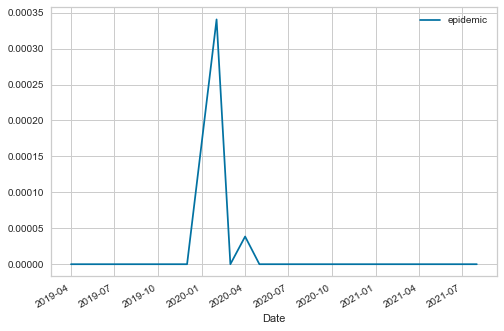

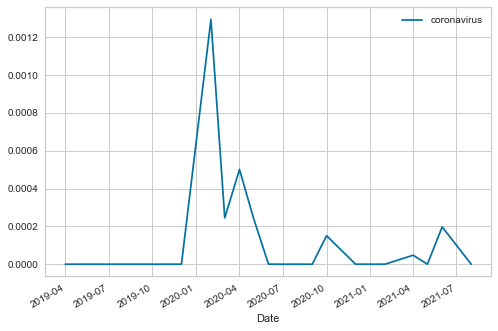

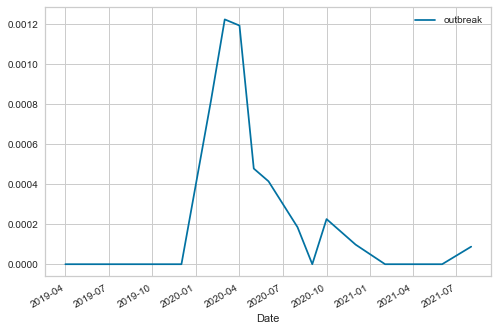

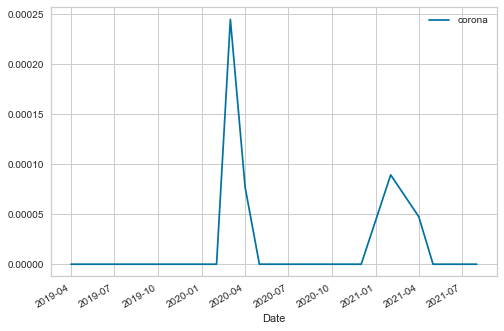

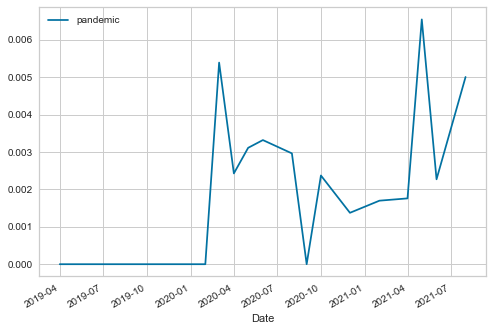

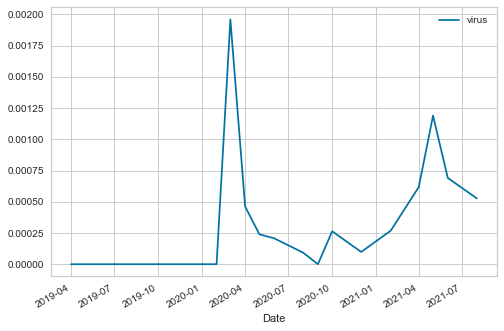

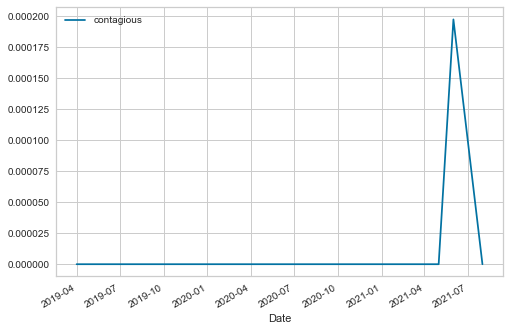

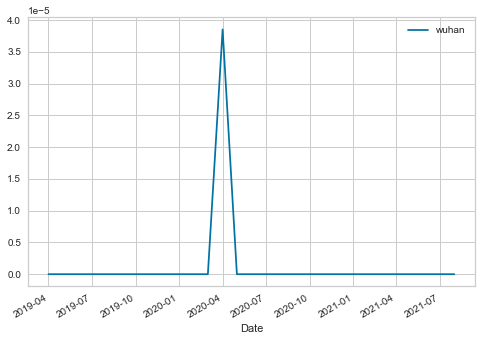

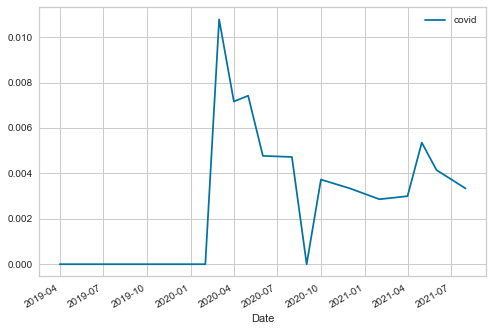

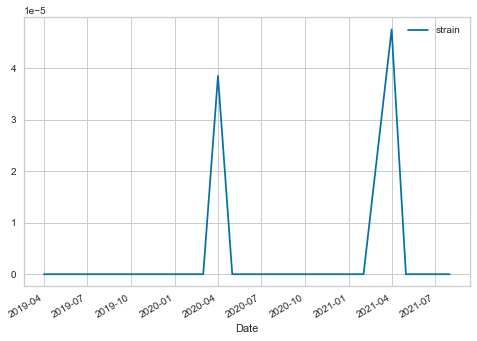

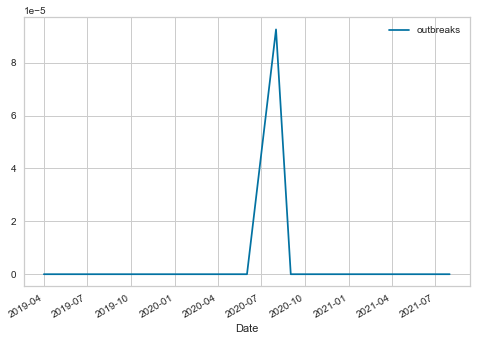

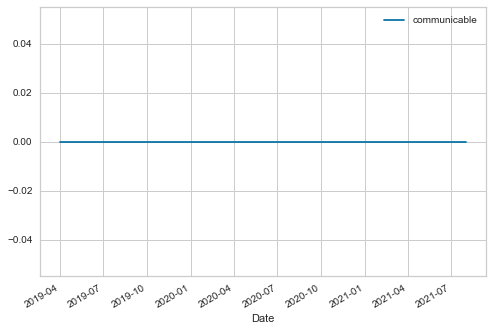

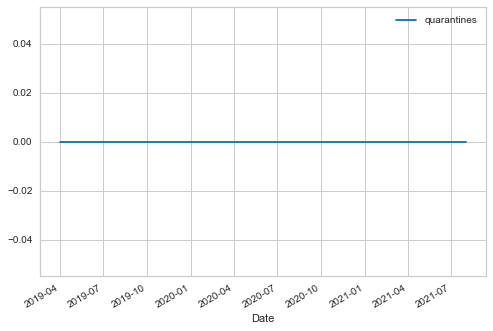

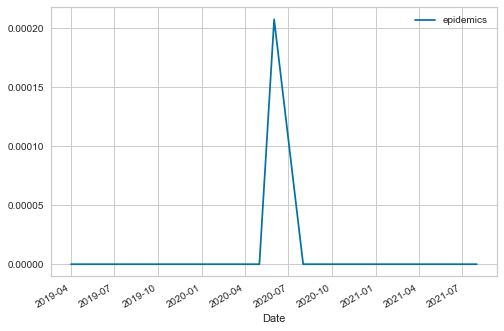

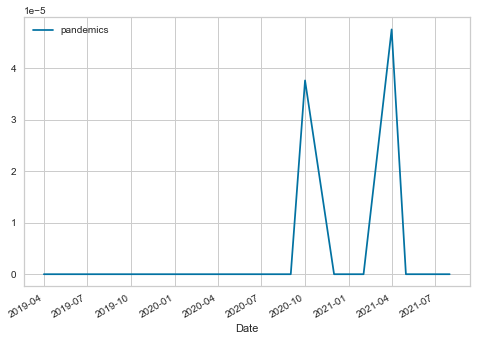

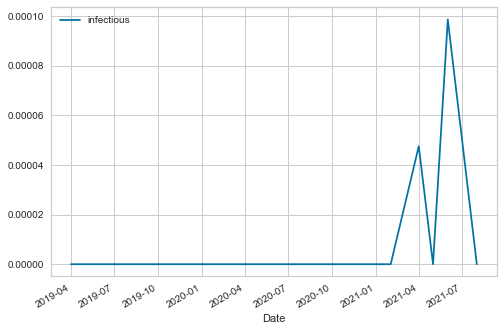

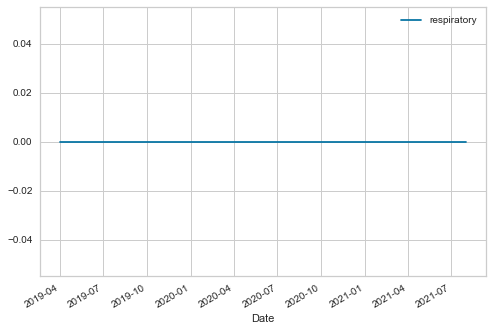

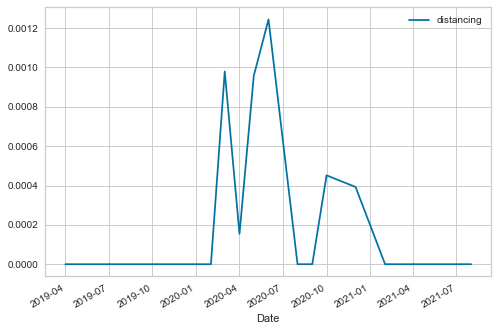

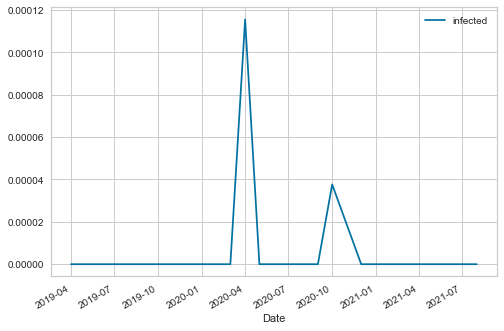

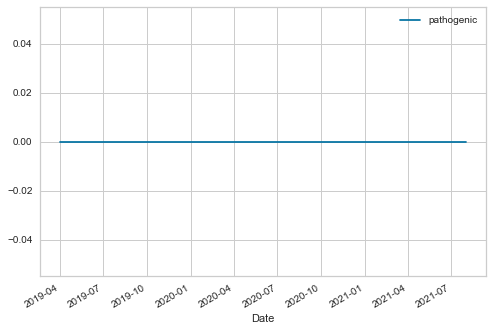

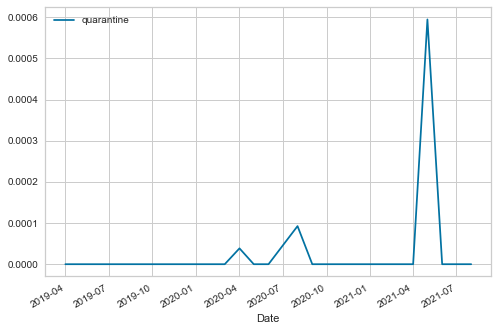

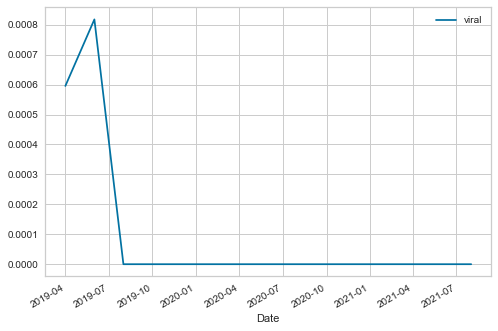

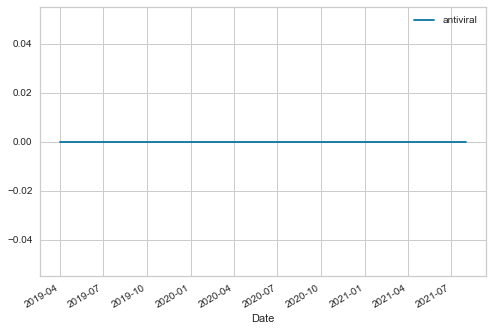

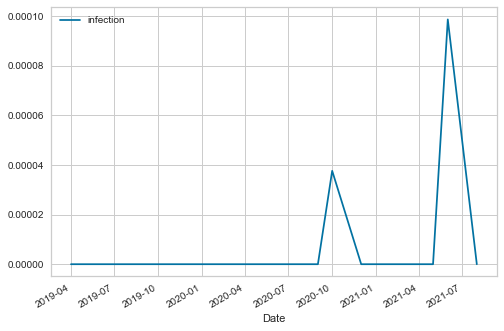

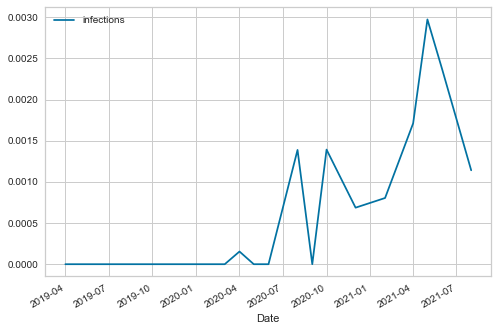

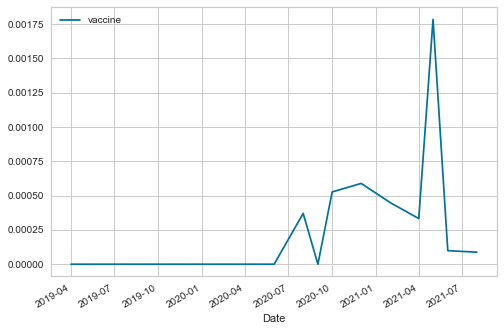

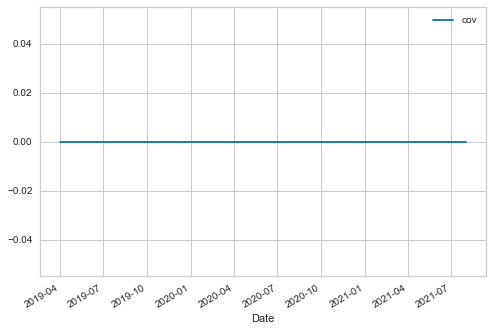

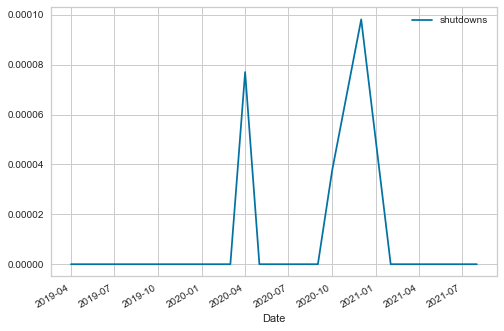

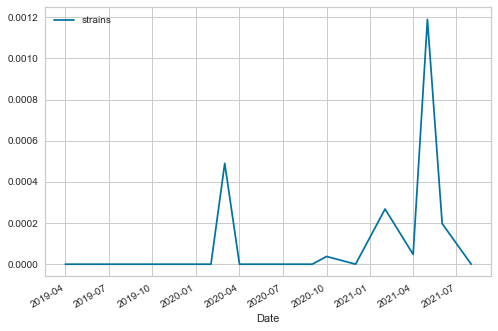

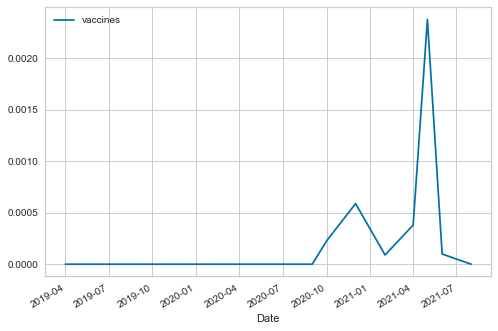

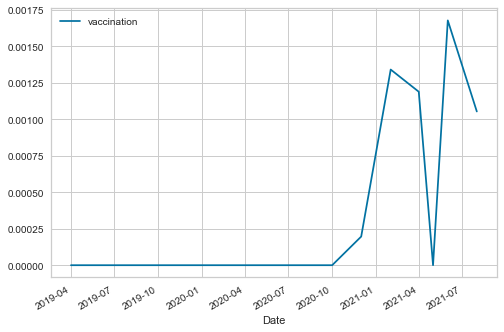

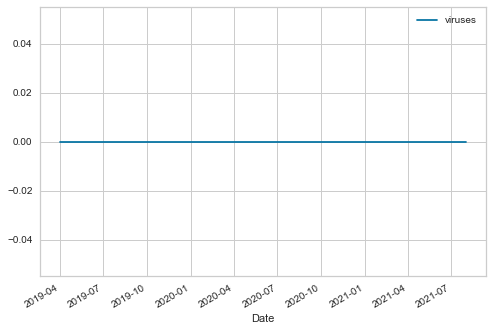

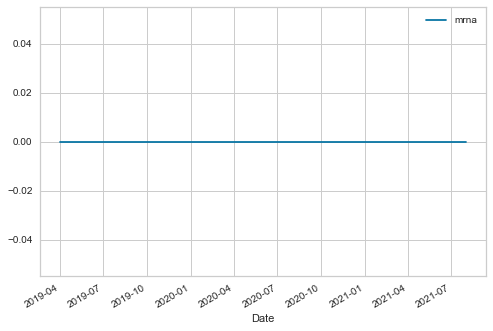

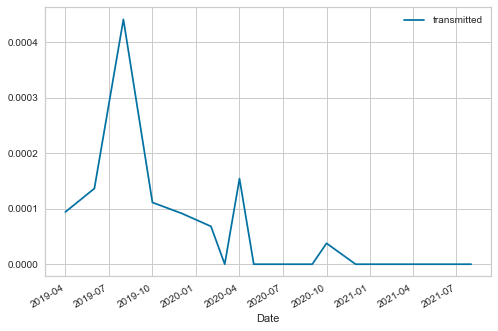

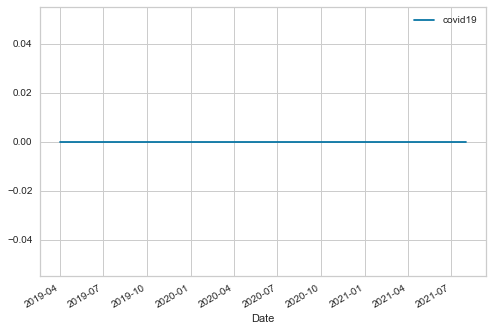

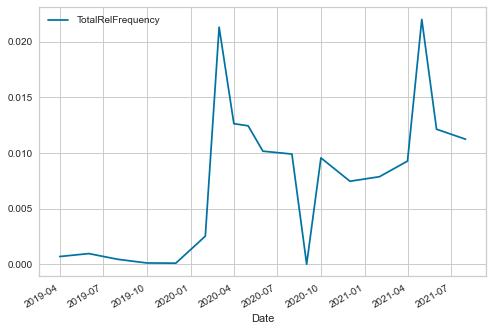

In [37]:
for i in range(1,37,1):
    FreqTable[FreqTable.columns[[i]]].plot(kind='line')

figure, axis = plt.subplots(3,2,figsize=(20,22))

for word in c_lex[0:6] :
    axis[0,0].plot(table_wo_num[word])
axis[0,0].legend(c_lex[0:6])

for word in c_lex[6:12] :
    axis[0,1].plot(table_wo_num[word])
axis[0,1].legend(c_lex[6:12])

for word in c_lex[12:18] :
    axis[1,0].plot(table_wo_num[word])
axis[1,0].legend(c_lex[12:18])

for word in c_lex[18:24] :
    axis[1,1].plot(table_wo_num[word])
axis[1,1].legend(c_lex[18:24])

for word in c_lex[24:30] :
    axis[2,0].plot(table_wo_num[word])
axis[2,0].legend(c_lex[24:30])

for word in c_lex[30:34] :
    axis[2,1].plot(table_wo_num[word])
axis[2,1].legend(c_lex[30:34])


# Covid Data:

In [151]:
covid_data = pd.read_csv('owid-covid-data.csv')
covid_new = covid_data[["iso_code",'date','new_cases','new_cases_smoothed']]
covid_ind = covid_new[covid_new["iso_code"] == 'IND']

In [152]:
covid_ind.index = pd.to_datetime(covid_ind['date'])

In [153]:
covid_ind = covid_ind.drop(['date','iso_code'],axis=1)

In [154]:
rolling_mean_case = FreqTable.TotalRelFrequency.rolling(window=3).mean()
rolling_mean_cov = covid_ind.new_cases.rolling(window=3).mean()

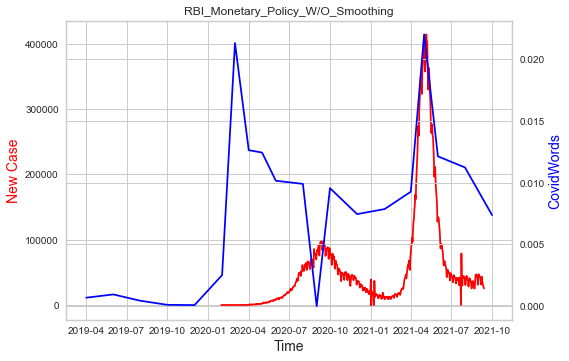

In [155]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(covid_ind.new_cases, color="red")
# set x-axis label
ax.set_xlabel("Time",fontsize=14)
# set y-axis label
ax.set_ylabel("New Case",color="red",fontsize=14)
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(FreqTable.TotalRelFrequency,color="blue")
ax2.set_ylabel("CovidWords",color="blue",fontsize=14)
plt.title('RBI_Monetary_Policy_W/O_Smoothing')
plt.show()

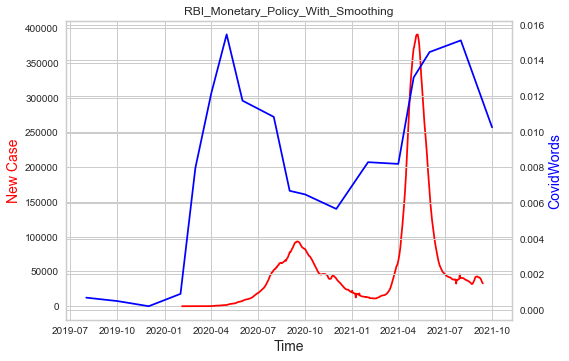

In [156]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(covid_ind.new_cases_smoothed, color="red")
# set x-axis label
ax.set_xlabel("Time",fontsize=14)
# set y-axis label
ax.set_ylabel("New Case",color="red",fontsize=14)
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(rolling_mean_case,color="blue")
ax2.set_ylabel("CovidWords",color="blue",fontsize=14)
plt.title('RBI_Monetary_Policy_With_Smoothing')
plt.show()

# 100 words before and 100 words after covid lexicon:

In [161]:
rbi_mpc['before_after_words'] = "will be filled"

In [164]:
running=[]
lst=[]
lst1=[]
for j in range(0,len(rbi_mpc),1) :
    
    for word in c_lex :
        
        for i in range(0,len(rbi_mpc['content_tokenized'][j])) :
            
            if rbi_mpc['content_tokenized'][j][i] == word :
                
                if i<101 :
                    
                    running = rbi_mpc['content_tokenized'][j][(i-i):(i+100):1]
                    print("Row ID: ",j,",Word position: ",i,",Word: ",word)
                    
                elif i>(len(rbi_mpc['content_tokenized'][j])-100) :
                    
                    running = rbi_mpc['content_tokenized'][j][(i-100):(len(rbi_mpc['content_tokenized'][j])):1]
                    print("Row ID: ",j,",Word position: ",i,",Word: ",word)
                    
                else :
                    
                    running = rbi_mpc['content_tokenized'][j][(i-100):(i+100):1]
                    print("Row ID: ",j,",Word position: ",i,",Word: ",word)
        
            if len(running) > 0 :
                lst.append(running)
                running = []
        
        if len(lst) > 0:
            lst1.append(lst)
            lst = []
    
    rbi_mpc.loc[j,"before_after_words"] = lst1
    lst1=[]

Row ID:  2 ,Word position:  2684 ,Word:  viral
Row ID:  2 ,Word position:  2706 ,Word:  viral
Row ID:  5 ,Word position:  19 ,Word:  viral
Row ID:  5 ,Word position:  3870 ,Word:  transmitted
Row ID:  5 ,Word position:  3873 ,Word:  transmitted
Row ID:  5 ,Word position:  3896 ,Word:  transmitted
Row ID:  6 ,Word position:  19 ,Word:  viral
Row ID:  6 ,Word position:  921 ,Word:  viral
Row ID:  6 ,Word position:  1770 ,Word:  viral
Row ID:  6 ,Word position:  2040 ,Word:  viral
Row ID:  6 ,Word position:  2208 ,Word:  viral
Row ID:  6 ,Word position:  3077 ,Word:  viral
Row ID:  6 ,Word position:  3250 ,Word:  viral
Row ID:  6 ,Word position:  4418 ,Word:  viral
Row ID:  6 ,Word position:  4551 ,Word:  viral
Row ID:  6 ,Word position:  4870 ,Word:  viral
Row ID:  6 ,Word position:  5087 ,Word:  viral
Row ID:  7 ,Word position:  112 ,Word:  viral
Row ID:  7 ,Word position:  3002 ,Word:  viral
Row ID:  7 ,Word position:  3024 ,Word:  viral
Row ID:  7 ,Word position:  3128 ,Word:  viral
R

# Sentiment Score

In [43]:
score_mpc = rbi_mpc[['date','content_clean','content_tokenized','w/o_num_lemm']]

# Loughran_Polarity

In [44]:
score_mpc['Loughran_Polarity'] = "will be filled"
lm = ps.LM()

for i in range(0,len(score_mpc),1):
    tokens = lm.tokenize(score_mpc['content_clean'][i].lower())
    score = lm.get_score(tokens)
    score_mpc.loc[i,'Loughran_Polarity'] = score.get('Polarity')

<ipython-input-44-b7e7090859be>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_mpc['Loughran_Polarity'] = "will be filled"
<ipython-input-44-b7e7090859be>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_mpc.loc[i,'Loughran_Polarity'] = score.get('Polarity')


# Loughran_Subjectivity

In [45]:
score_mpc['Loughran_Subjectivity'] = "will be filled"
lm = ps.LM()

for i in range(0,len(score_mpc),1):
    tokens = lm.tokenize(score_mpc['content_clean'][i].lower())
    score = lm.get_score(tokens)
    score_mpc.loc[i,'Loughran_Subjectivity'] = score.get("Subjectivity")

<ipython-input-45-19e445f1b7af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_mpc['Loughran_Subjectivity'] = "will be filled"
<ipython-input-45-19e445f1b7af>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_mpc.loc[i,'Loughran_Subjectivity'] = score.get("Subjectivity")


# NRC_Polarity

In [46]:
score_mpc['NRC_Polarity'] = "will be filled"
p1 = 0
n1 = 0

for i in range(0,len(score_mpc),1):
    
    for j in range(0,len(score_mpc['w/o_num_lemm'][i]),1):
        
        score = NRCLex(score_mpc['w/o_num_lemm'][i][j]).raw_emotion_scores
        
        p = score.get("positive")
        # print('pos :',p)
        if p == 1 :
            p1 = p1 + 1
        else :
            p1 = p1
        
        n = score.get("negative")
        # print('neg :',n)
        if n == 1 :
            n1 = n1 + 1
        else :
            n1 = n1
            
    if (p1 + n1) == 0 :
        score_mpc.loc[i,'NRC_Polarity'] = "Null"
        
    else :
        score_mpc.loc[i,'NRC_Polarity'] = (p1 - n1)/(p1 + n1)
    p1 = 0
    n1 = 0        

<ipython-input-46-c1ab6d499244>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_mpc['NRC_Polarity'] = "will be filled"
<ipython-input-46-c1ab6d499244>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_mpc.loc[i,'NRC_Polarity'] = (p1 - n1)/(p1 + n1)


# Financial Stability Score

In [95]:
finstab = pd.read_excel('E:/NLP_PROJECT/Finstab.xlsx')

In [96]:
finstab_set_pos = {word for word in finstab.loc[finstab['Positive'] == 1]['Word']}

In [97]:
finstab_set_neg = {word for word in finstab.loc[finstab['Negative'] == 1]['Word']}

In [50]:
score_mpc['Financial_Stab_Score'] = "will be filled"
p = 0
n = 0

for i in range(0,len(score_mpc),1):
    
    for j in range(0,len(score_mpc['w/o_num_lemm'][i]),1):
        
        set_word = {word for word in score_mpc['w/o_num_lemm'][i]}
        pos_set = finstab_set_pos.intersection(set_word)
        neg_set = finstab_set_neg.intersection(set_word)
        p = len(pos_set)
        n = len(neg_set)
      
    if (p + n) == 0 :
        score_mpc.loc[i,'Financial_Stab_Score'] = "Null"
        
    else :
        score_mpc.loc[i,'Financial_Stab_Score'] = (p - n)/(p + n)
    # print("Row No:",i)

<ipython-input-50-0100bd84cfde>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_mpc['Financial_Stab_Score'] = "will be filled"
<ipython-input-50-0100bd84cfde>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_mpc.loc[i,'Financial_Stab_Score'] = (p - n)/(p + n)
<ipython-input-50-0100bd84cfde>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_mpc.loc[i,'Financial

# Sentiword Score

In [51]:
score_mpc['Sentiword_Score'] = "will be filled"
p = 0
n = 0

for i in range(0,len(score_mpc),1):
    text = score_mpc['w/o_num_lemm'][i]
    tagged_sent = pos_tag(text)
    store_it = [(word, map_tag('en-ptb', 'universal', tag)) for word, tag in tagged_sent]
    
    for word,tag in store_it:
        
        if(tag=='NOUN'):
            tag='n'
        elif(tag=='VERB'):
            tag='v'
        elif(tag=='ADJ'):
            tag='a'
        elif(tag=='ADV'):
            tag ='r'
        else:
            tag='nothing'
    
        concat = word+'.'+tag+'.01'
    
        try:
            p1 = swn.senti_synset(concat).pos_score()
            n1 = swn.senti_synset(concat).neg_score()
        except:
            print('Null')
            
        p = p + p1
        n = n + n1
    
    if (p + n) == 0 :
        score_mpc.loc[i,'Sentiword_Score'] = "Null"
        
    else :
        score_mpc.loc[i,'Sentiword_Score'] = ((p - n)/(p + n))
    
    p = 0
    n = 0

<ipython-input-51-1eccd17774cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_mpc['Sentiword_Score'] = "will be filled"


Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null


<ipython-input-51-1eccd17774cf>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_mpc.loc[i,'Sentiword_Score'] = ((p - n)/(p + n))


Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null


# Hu & Liu Score

In [84]:
huliu = pd.read_csv('E:/NLP_PROJECT/huliu.csv')

In [85]:
huliu_set_pos = {word for word in huliu.loc[huliu['y'] == 1]['x']}

In [86]:
huliu_set_neg = {word for word in huliu.loc[huliu['y'] == -1]['x']}

In [55]:
score_mpc['Hu & Liu Polarity'] = "will be filled"
p = 0
n = 0

for i in range(0,len(score_mpc),1):
    
    for j in range(0,len(score_mpc['w/o_num_lemm'][i]),1):
        
        set_word = {word for word in score_mpc['w/o_num_lemm'][i]}
        pos_set = huliu_set_pos.intersection(set_word)
        neg_set = huliu_set_neg.intersection(set_word)
        p = len(pos_set)
        n = len(neg_set)
        
    if (p + n) == 0 :
        score_mpc.loc[i,'Hu & Liu Polarity'] = "Null"
        
    else :
        score_mpc.loc[i,'Hu & Liu Polarity'] = (p - n)/(p + n)
    # print("Row No:",i)

<ipython-input-55-5830605ca35a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_mpc['Hu & Liu Polarity'] = "will be filled"
<ipython-input-55-5830605ca35a>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_mpc.loc[i,'Hu & Liu Polarity'] = (p - n)/(p + n)
<ipython-input-55-5830605ca35a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_mpc.loc[i,'Hu & Liu Polari

# Loughran Uncertainty

In [87]:
loughran = pd.read_csv('E:/NLP_PROJECT/loughran.csv')

In [88]:
loughran_word = {word for word in loughran['word']}

In [58]:
score_mpc['Loughran_Uncertainty'] = "will be filled"
p = 0

for i in range(0,len(score_mpc),1):
    for j in range(0,len(score_mpc['w/o_num_lemm'][i]),1):
        set_word = {word for word in score_mpc['w/o_num_lemm'][i]}
        set_total = loughran_word.intersection(set_word)
        p = len(set_total)
    
    score_mpc.loc[i,'Loughran_Uncertainty'] = (p)/(len(score_mpc['w/o_num_lemm'][i]))
    # print("Row No:",i)    

In [59]:
score_mpc

date                                      content_clean  \
0    Apr 04, 2019      Contents   Chapter I Macroeconomic Outlook...   
1    Apr 04, 2019    This Statement sets out various developmenta...   
2    Apr 04, 2019    On the basis of an assessment of the current...   
3    Apr 04, 2019    Hon’ble Supreme Court has held the RBI circu...   
4    Apr 04, 2019    The Monetary Policy Committee MPC reviewed m...   
..            ...                                                ...   
87   Oct 08, 2021    This Statement sets out various developmenta...   
88   Oct 08, 2021    On the basis of an assessment of the current...   
89   Oct 08, 2021    This is my twelfth statement since the onset...   
90   Oct 11, 2021    Participants from RBI Shri Shaktikanta Das –...   
91   Oct 22, 2021    Under Section 45ZL of the Reserve Bank of In...   

                                    content_tokenized  \
0   [contents, chapter, i, macroeconomic, outlook,...   
1   [this, statement, sets, out, various, developm...   
2   [on, the, basis, of, an, assessment, of, the, ...   
3   [hon, ’, ble, supreme, court, has, held, the, ...   
4   [the, monetary, policy, committee, mpc, review...   
..                                                ...   
87  [this, statement, sets, out, various, developm...   
88  [on, the, basis, of, an, assessment, of, the, ...   
89  [this, is, my, twelfth, statement, since, the,...   
90  [participants, from, rbi, shri, shaktikanta, d...   
91  [under, section, 45zl, of, the, reserve, bank,...   

                                         w/o_num_lemm Loughran_Polarity  \
0   [content, chapter, macroeconomic, outlook, key...         -0.477294   
1   [statement, set, various, developmental, regul...         -0.220339   
2   [basis, assessment, current, evolving, macroec...         -0.469027   
3   [hon, ble, supreme, court, held, rbi, circular...         -0.428571   
4   [monetary, policy, committee, mpc, reviewed, m...         -0.333333   
..                                                ...               ...   
87  [statement, set, various, developmental, regul...         -0.142857   
88  [basis, assessment, current, evolving, macroec...          -0.15625   
89  [twelfth, statement, since, onset, pandemic, t...         -0.122807   
90  [participant, rbi, shri, shaktikanta, governor...         -0.568345   
91  [section, reserve, bank, india, act, thirty, f...          -0.29805   

   Loughran_Subjectivity NRC_Polarity Financial_Stab_Score Sentiword_Score  \
0              0.0759966     0.108383            -0.385965       0.0143122   
1              0.0699052     0.244444             0.285714        0.270537   
2              0.0826023     0.160883                -0.25      -0.0267775   
3              0.0909091     0.411765                    1             0.6   
4              0.0746888     0.246637            -0.130435       0.0506329   
..                   ...          ...                  ...             ...   
87             0.0876217     0.294118             0.555556         0.28932   
88             0.0687433     0.301724            0.0769231        0.119701   
89             0.0717884     0.288221                 0.25        0.127644   
90             0.0680705      0.30411                  0.1        0.206415   
91             0.0854965     0.209814            -0.116883        0.041589   

   Hu & Liu Polarity Loughran_Uncertainty  
0         -0.0214286             0.003052  
1           0.348837           0.00403226  
2         -0.0422535           0.00854701  
3                0.6            0.0344828  
4          0.0566038            0.0086881  
..               ...                  ...  
87           0.44186           0.00374532  
88          0.130435            0.0118613  
89          0.279279            0.0080171  
90          0.168539           0.00636672  
91          0.122449            0.0066385  

[92 rows x 11 columns]

In [60]:
score_col = [0] + [i for i in range(4,11,1)]

In [61]:
score_mpc_new = score_mpc[score_mpc["Financial_Stab_Score"] != "Null"]

In [62]:
score_mpc_new.index = pd.to_datetime(score_mpc_new['date'])

In [63]:
# score_mpc[score_mpc.columns[score_col]].to_csv('score_mpc.csv')

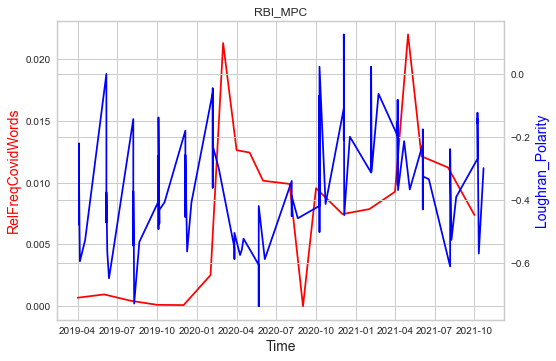

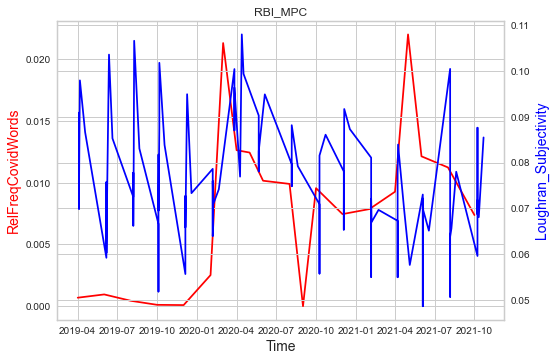

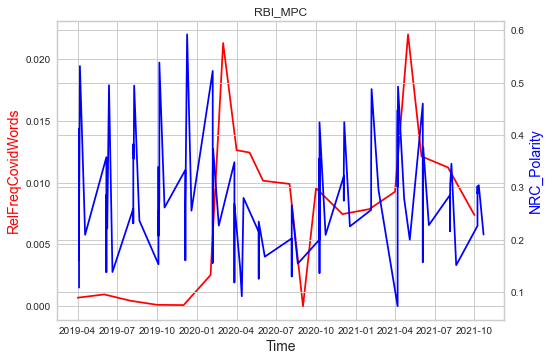

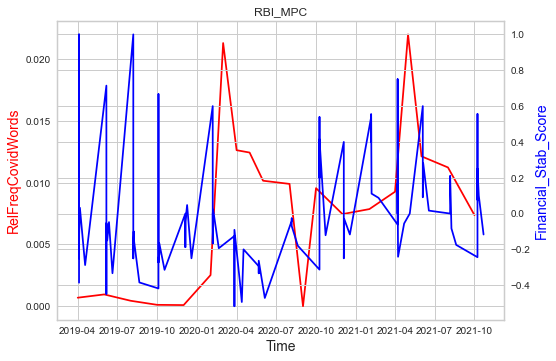

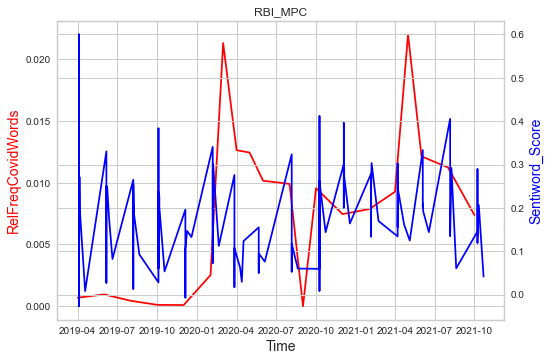

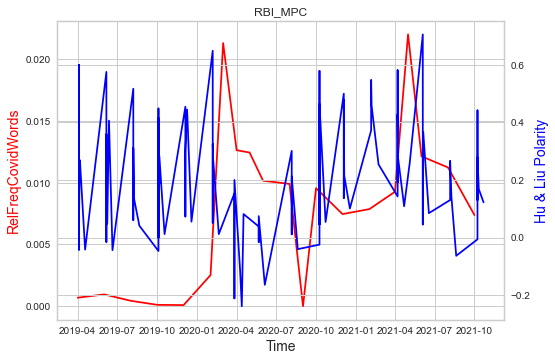

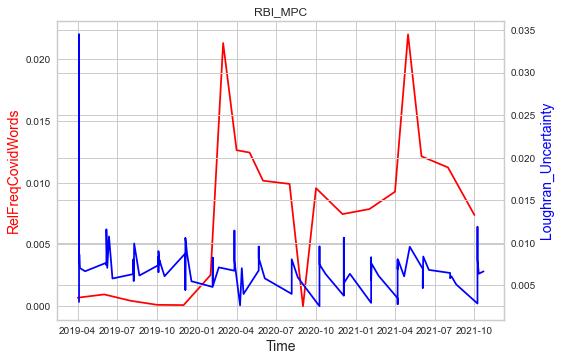

In [187]:
for i in range(4,11,1) :
    # create figure and axis objects with subplots()
    fig,ax = plt.subplots()
    # make a plot
    ax.plot(FreqTable.TotalRelFrequency, color="red")
    # set x-axis label
    ax.set_xlabel("Time",fontsize=14)
    # set y-axis label
    ax.set_ylabel("RelFreqCovidWords",color="red",fontsize=14)
    ax2=ax.twinx()
    # make a plot with different y-axis using second axis object
    ax2.plot(score_mpc_new[score_mpc_new.columns[[i]]],color="blue")
    ax2.set_ylabel(score_mpc_new.columns[i],color="blue",fontsize=14)
    plt.title('RBI_MPC')
    a = score_mpc_new.columns[i]+'RBI_MPC'+".jpg"
    plt.savefig(a)
    plt.show()

# Merging : 

In [81]:
score_mpc_merge = rbi_mpc[['date','content_clean']]

In [82]:
for i in range(0,len(score_mpc_merge),1):
    score_mpc_merge.loc[i,"date"] = score_mpc_merge['date'][i][1:4:]+str(",")+score_mpc_merge['date'][i][9:14:]

C:\Users\Arijit\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\Arijit\anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [83]:
score_mpc_merge['content_clean'] = score_mpc_merge.groupby(['date'])['content_clean'].transform(lambda x : ' '.join(x))
score_mpc_merge = score_mpc_merge.drop_duplicates()
score_mpc_merge = score_mpc_merge.reset_index(drop=True)

<ipython-input-83-e9e3c2bcb7cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_mpc_merge['content_clean'] = score_mpc_merge.groupby(['date'])['content_clean'].transform(lambda x : ' '.join(x))


In [84]:
score_mpc_merge['content_tokenized'] = score_mpc_merge['content_clean'].apply(lambda x: nltk.word_tokenize(x.lower()))

In [85]:
stopwords = nltk.corpus.stopwords.words('english')
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopwords]
    return text

score_mpc_merge['content_tokenized'] = score_mpc_merge['content_tokenized'].apply(lambda x: remove_stopwords(x))

In [86]:
wn = nltk.WordNetLemmatizer()
def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

score_mpc_merge['content_tokenized'] = score_mpc_merge['content_tokenized'].apply(lambda x: lemmatizing(x))

In [88]:
wolist = []
for i in range(0,len(score_mpc_merge),1) :
    
    for j in range(0,len(score_mpc_merge['content_tokenized'][i]),1) :
        
        text = score_mpc_merge['content_tokenized'][i][j]
        run = re.sub('[0-9]+', '', text)
        wolist.append(run)
    
    score_mpc_merge.at[i,'content_tokenized'] = wolist
    wolist=[]

In [89]:
def short_remove_new(x):
    
    sh_list = []

    for j in range(0,len(score_mpc_merge),1) :
    
        for i in range(0,len(score_mpc_merge[x][j])) :
        
            if len(score_mpc_merge[x][j][i]) > 2:
            
                main = score_mpc_merge[x][j][i]
                sh_list.append(main)
    
        score_mpc_merge.at[j,x] = sh_list
        sh_list=[]

In [90]:
short_remove_new('content_tokenized')

# Sentiment Score

# Loughran_Polarity

In [91]:
score_mpc_merge['Loughran_Polarity'] = "will be filled"
lm = ps.LM()

for i in range(0,len(score_mpc_merge),1):
    tokens = lm.tokenize(score_mpc_merge['content_clean'][i].lower())
    score = lm.get_score(tokens)
    score_mpc_merge.loc[i,'Loughran_Polarity'] = score.get('Polarity')

# Loughran_Subjectivity

In [92]:
score_mpc_merge['Loughran_Subjectivity'] = "will be filled"
lm = ps.LM()

for i in range(0,len(score_mpc_merge),1):
    tokens = lm.tokenize(score_mpc_merge['content_clean'][i].lower())
    score = lm.get_score(tokens)
    score_mpc_merge.loc[i,'Loughran_Subjectivity'] = score.get("Subjectivity")

# NRC_Polarity

In [93]:
score_mpc_merge['NRC_Polarity'] = "will be filled"
p1 = 0
n1 = 0

for i in range(0,len(score_mpc_merge),1):
    
    for j in range(0,len(score_mpc_merge['content_tokenized'][i]),1):
        
        score = NRCLex(score_mpc_merge['content_tokenized'][i][j]).raw_emotion_scores
        
        p = score.get("positive")
        # print('pos :',p)
        if p == 1 :
            p1 = p1 + 1
        else :
            p1 = p1
        
        n = score.get("negative")
        # print('neg :',n)
        if n == 1 :
            n1 = n1 + 1
        else :
            n1 = n1
            
    if (p1 + n1) == 0 :
        score_mpc_merge.loc[i,'NRC_Polarity'] = "Null"
        
    else :
        score_mpc_merge.loc[i,'NRC_Polarity'] = (p1 - n1)/(p1 + n1)
    p1 = 0
    n1 = 0        

In [100]:
score_mpc_merge

date                                      content_clean  \
0   Apr,2019      Contents   Chapter I Macroeconomic Outlook...   
1   Jun,2019    This Statement sets out various developmenta...   
2   Aug,2019    This Statement sets out various developmenta...   
3   Oct,2019      Contents   Chapter I Macroeconomic Outlook...   
4   Dec,2019    This Statement sets out various developmenta...   
5   Feb,2020    This Statement sets out various developmenta...   
6   Mar,2020    This Statement sets out various developmenta...   
7   Apr,2020      Contents   Chapter I Macroeconomic Outlook...   
8   May,2020    This Statement sets out various developmenta...   
9   Jun,2020    Under Section 45ZL of the Reserve Bank of In...   
10  Aug,2020    This Statement sets out various developmenta...   
11  Sep,2020     The meeting of the Monetary Policy Committe...   
12  Oct,2020     In continuation of the Press Release 202020...   
13  Dec,2020    This Statement sets out various developmenta...   
14  Feb,2021    This Statement sets out various developmenta...   
15  Apr,2021      Contents    Chapter I Macroeconomic Outloo...   
16  May,2021    As the financial year 202021 – the year of t...   
17  Jun,2021    This Statement sets out various developmenta...   
18  Aug,2021    This Statement sets out various developmenta...   
19  Oct,2021      Contents   Chapter I Macroeconomic Outlook...   

                                    content_tokenized Loughran_Polarity  \
0   [content, chapter, macroeconomic, outlook, key...         -0.485477   
1   [statement, set, various, developmental, regul...         -0.543825   
2   [statement, set, various, developmental, regul...         -0.522513   
3   [content, chapter, macroeconomic, outlook, key...         -0.415973   
4   [statement, set, various, developmental, regul...         -0.414925   
5   [statement, set, various, developmental, regul...            -0.232   
6   [statement, set, various, developmental, regul...         -0.536585   
7   [content, chapter, macroeconomic, outlook, out...         -0.565022   
8   [statement, set, various, developmental, regul...         -0.549488   
9   [section, reserve, bank, india, act, twenty, t...         -0.586207   
10  [statement, set, various, developmental, regul...         -0.421853   
11  [meeting, monetary, policy, committee, mpc, se...              -1.0   
12  [continuation, press, release, dated, septembe...         -0.370732   
13  [statement, set, various, developmental, regul...         -0.251682   
14  [statement, set, various, developmental, regul...         -0.140244   
15  [content, chapter, macroeconomic, outlook, key...           -0.2256   
16  [financial, year, year, pandemic, drawing, clo...         -0.365854   
17  [statement, set, various, developmental, regul...         -0.298246   
18  [statement, set, various, developmental, measu...         -0.408163   
19  [content, chapter, macroeconomic, outlook, key...         -0.280846   

   Loughran_Subjectivity NRC_Polarity Financial_Stab_Score Sentiword_Score  
0                0.08086     0.196785            -0.388889        0.072539  
1               0.081434     0.218286            -0.291667        0.152172  
2               0.082943     0.316124            -0.247059        0.155508  
3               0.080428     0.256417            -0.322314        0.127258  
4                0.07405     0.299088                 -0.2        0.118447  
5               0.072518     0.292453             -0.08046        0.204342  
6                0.09488     0.241126            -0.304348        0.116603  
7               0.083921     0.145384            -0.402439        0.060091  
8               0.083643      0.20331            -0.322581        0.100046  
9               0.094914     0.167455            -0.471264        0.076113  
10              0.080396     0.178434            -0.168317        0.109498  
11              0.090909          1.0                 Null             1.0  
12              0.07396

# Financial Stability Score

In [98]:
score_mpc_merge['Financial_Stab_Score'] = "will be filled"
p = 0
n = 0

for i in range(0,len(score_mpc_merge),1):
    
    for j in range(0,len(score_mpc_merge['content_tokenized'][i]),1):
        
        set_word = {word for word in score_mpc_merge['content_tokenized'][i]}
        pos_set = finstab_set_pos.intersection(set_word)
        neg_set = finstab_set_neg.intersection(set_word)
        p = len(pos_set)
        n = len(neg_set)
      
    if (p + n) == 0 :
        score_mpc_merge.loc[i,'Financial_Stab_Score'] = "Null"
        
    else :
        score_mpc_merge.loc[i,'Financial_Stab_Score'] = (p - n)/(p + n)
    print("Row No:",i)

Row No: 0
Row No: 1
Row No: 2
Row No: 3
Row No: 4
Row No: 5
Row No: 6
Row No: 7
Row No: 8
Row No: 9
Row No: 10
Row No: 11
Row No: 12
Row No: 13
Row No: 14
Row No: 15
Row No: 16
Row No: 17
Row No: 18
Row No: 19


# Sentiword Score

In [99]:
score_mpc_merge['Sentiword_Score'] = "will be filled"
p = 0
n = 0

for i in range(0,len(score_mpc_merge),1):
    text = score_mpc_merge['content_tokenized'][i]
    tagged_sent = pos_tag(text)
    store_it = [(word, map_tag('en-ptb', 'universal', tag)) for word, tag in tagged_sent]
    
    for word,tag in store_it:
        
        if(tag=='NOUN'):
            tag='n'
        elif(tag=='VERB'):
            tag='v'
        elif(tag=='ADJ'):
            tag='a'
        elif(tag=='ADV'):
            tag ='r'
        else:
            tag='nothing'
    
        concat = word+'.'+tag+'.01'
    
        try:
            p1 = swn.senti_synset(concat).pos_score()
            n1 = swn.senti_synset(concat).neg_score()
        except:
            print('Null')
            
        p = p + p1
        n = n + n1
    
    if (p + n) == 0 :
        score_mpc_merge.loc[i,'Sentiword_Score'] = "Null"
        
    else :
        score_mpc_merge.loc[i,'Sentiword_Score'] = ((p - n)/(p + n))
    p = 0
    n = 0

Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null


# Hu & Liu Score

In [ ]:
score_mpc_merge['Hu & Liu Polarity'] = "will be filled"
p = 0
n = 0

for i in range(0,len(score_mpc_merge),1):
    
    for j in range(0,len(score_mpc_merge['content_tokenized'][i]),1):
        
        set_word = {word for word in score_mpc_merge['content_tokenized'][i]}
        pos_set = huliu_set_pos.intersection(set_word)
        neg_set = huliu_set_neg.intersection(set_word)
        p = len(pos_set)
        n = len(neg_set)
    if (p + n) == 0 :
        score_mpc_merge.loc[i,'Hu & Liu Polarity'] = "Null"
        
    else :
        score_mpc_merge.loc[i,'Hu & Liu Polarity'] = (p - n)/(p + n)
    print("Row No:",i)

# Loughran Uncertainty

In [ ]:
loughran = pd.read_csv('E:/NLP_PROJECT/loughran.csv')

In [ ]:
loughran_word = {word for word in loughran['word']}

In [ ]:
score_mpc_merge['Loughran_Uncertainty'] = "will be filled"
p = 0

for i in range(0,len(score_mpc_merge),1):
    for j in range(0,len(score_mpc_merge['content_tokenized'][i]),1):
        set_word = {word for word in score_mpc_merge['content_tokenized'][i]}
        set_total = loughran_word.intersection(set_word)
        p = len(set_total)
    
    score_mpc_merge.loc[i,'Loughran_Uncertainty'] = (p)/(len(score_mpc_merge['content_tokenized'][i]))
    print("Row No:",i)    

In [ ]:
score_mpc_merge = score_mpc_merge[score_mpc_merge["Financial_Stab_Score"] != "Null"]

In [ ]:
score_mpc_merge.index = pd.to_datetime(score_mpc_merge['date'])

In [120]:
score_mpc_merge.to_csv('score_mpc_merge.csv')

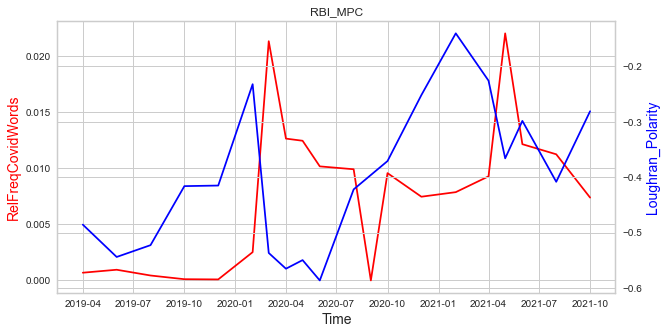

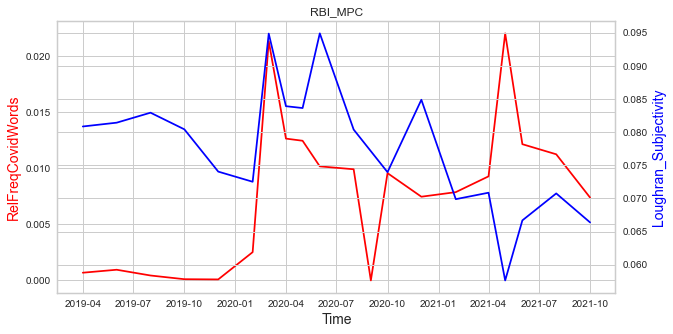

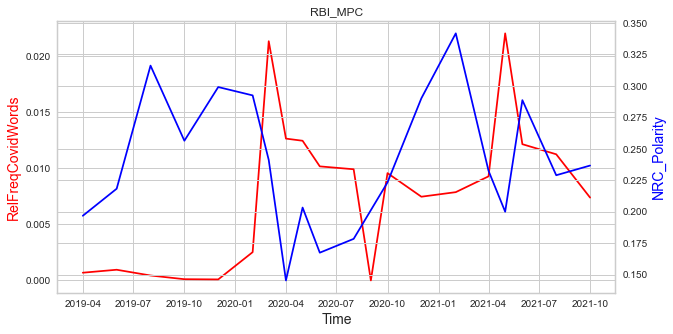

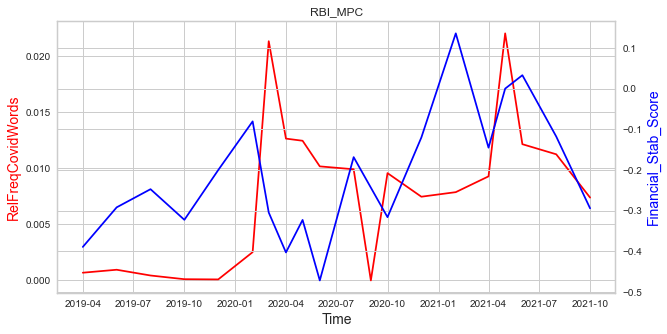

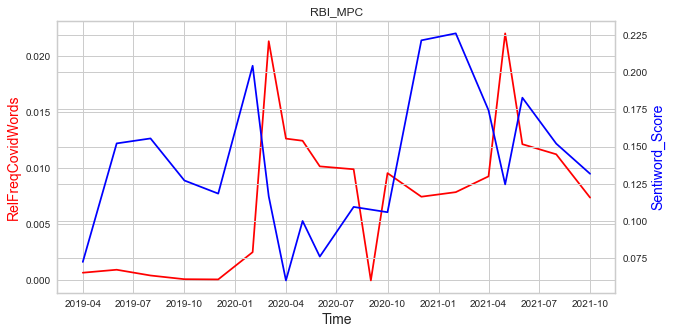

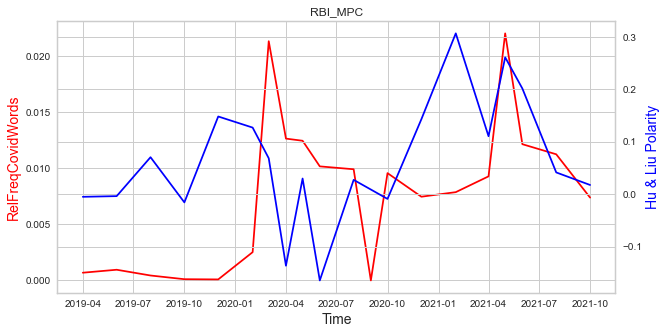

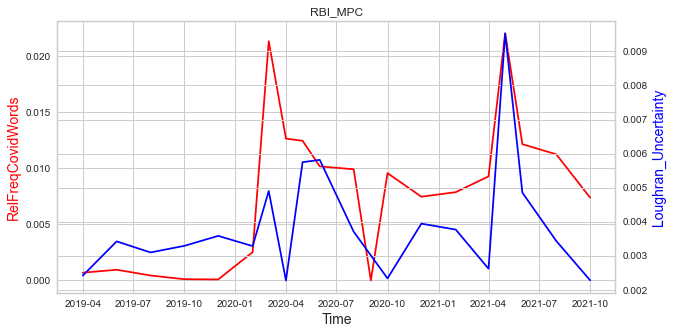

In [124]:
for i in range(3,10,1) :
    plt.rcParams['figure.figsize'] = 10, 5
    # create figure and axis objects with subplots()
    fig,ax = plt.subplots()
    # make a plot
    ax.plot(FreqTable.TotalRelFrequency, color="red")
    # set x-axis label
    ax.set_xlabel("Time",fontsize=14)
    # set y-axis label
    ax.set_ylabel("RelFreqCovidWords",color="red",fontsize=14)
    ax2=ax.twinx()
    # make a plot with different y-axis using second axis object
    ax2.plot(score_mpc_merge[score_mpc_merge.columns[[i]]],color="blue")
    ax2.set_ylabel(score_mpc_merge.columns[i],color="blue",fontsize=14)
    plt.title('RBI_MPC')
    a = score_mpc_merge.columns[i]+'RBI_MPC'+".jpg"
    plt.savefig(a)
    plt.show()

# Merging by Date : 

In [163]:
score_mpc_merge_date = rbi_mpc[['date','content_clean']]

In [167]:
score_mpc_merge_date['content_clean'] = score_mpc_merge_date.groupby(['date'])['content_clean'].transform(lambda x : ' '.join(x))
score_mpc_merge_date = score_mpc_merge_date.drop_duplicates()
score_mpc_merge_date = score_mpc_merge_date.reset_index(drop=True)

<ipython-input-167-bda45846a6eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_mpc_merge_date['content_clean'] = score_mpc_merge_date.groupby(['date'])['content_clean'].transform(lambda x : ' '.join(x))


In [169]:
score_mpc_merge_date['content_tokenized'] = score_mpc_merge_date['content_clean'].apply(lambda x: nltk.word_tokenize(x.lower()))

In [170]:
stopwords = nltk.corpus.stopwords.words('english')
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopwords]
    return text

score_mpc_merge_date['content_tokenized'] = score_mpc_merge_date['content_tokenized'].apply(lambda x: remove_stopwords(x))

In [171]:
wn = nltk.WordNetLemmatizer()
def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

score_mpc_merge_date['content_tokenized'] = score_mpc_merge_date['content_tokenized'].apply(lambda x: lemmatizing(x))

In [172]:
wolist = []
for i in range(0,len(score_mpc_merge_date),1) :
    
    for j in range(0,len(score_mpc_merge_date['content_tokenized'][i]),1) :
        
        text = score_mpc_merge_date['content_tokenized'][i][j]
        run = re.sub('[0-9]+', '', text)
        wolist.append(run)
    
    score_mpc_merge_date.at[i,'content_tokenized'] = wolist
    wolist=[]

In [173]:
def short_remove_new(x):
    
    sh_list = []

    for j in range(0,len(score_mpc_merge_date),1) :
    
        for i in range(0,len(score_mpc_merge_date[x][j])) :
        
            if len(score_mpc_merge_date[x][j][i]) > 2:
            
                main = score_mpc_merge_date[x][j][i]
                sh_list.append(main)
    
        score_mpc_merge_date.at[j,x] = sh_list
        sh_list=[]

In [174]:
short_remove_new('content_tokenized')

# Sentiment Score

# Loughran_Polarity

In [175]:
score_mpc_merge_date['Loughran_Polarity'] = "will be filled"
lm = ps.LM()

for i in range(0,len(score_mpc_merge_date),1):
    tokens = lm.tokenize(score_mpc_merge_date['content_clean'][i].lower())
    score = lm.get_score(tokens)
    score_mpc_merge_date.loc[i,'Loughran_Polarity'] = score.get('Polarity')

# Loughran_Subjectivity

In [176]:
score_mpc_merge_date['Loughran_Subjectivity'] = "will be filled"
lm = ps.LM()

for i in range(0,len(score_mpc_merge_date),1):
    tokens = lm.tokenize(score_mpc_merge_date['content_clean'][i].lower())
    score = lm.get_score(tokens)
    score_mpc_merge_date.loc[i,'Loughran_Subjectivity'] = score.get("Subjectivity")

# NRC_Polarity

In [177]:
score_mpc_merge_date['NRC_Polarity'] = "will be filled"
p1 = 0
n1 = 0

for i in range(0,len(score_mpc_merge_date),1):
    
    for j in range(0,len(score_mpc_merge_date['content_tokenized'][i]),1):
        
        score = NRCLex(score_mpc_merge_date['content_tokenized'][i][j]).raw_emotion_scores
        
        p = score.get("positive")
        # print('pos :',p)
        if p == 1 :
            p1 = p1 + 1
        else :
            p1 = p1
        
        n = score.get("negative")
        # print('neg :',n)
        if n == 1 :
            n1 = n1 + 1
        else :
            n1 = n1
            
    if (p1 + n1) == 0 :
        score_mpc_merge_date.loc[i,'NRC_Polarity'] = "Null"
        
    else :
        score_mpc_merge_date.loc[i,'NRC_Polarity'] = (p1 - n1)/(p1 + n1)
    p1 = 0
    n1 = 0        

# Financial Stability Score

In [95]:
finstab = pd.read_excel('E:/NLP_PROJECT/Finstab.xlsx')

In [96]:
finstab_set_pos = {word for word in finstab.loc[finstab['Positive'] == 1]['Word']}

In [97]:
finstab_set_neg = {word for word in finstab.loc[finstab['Negative'] == 1]['Word']}

In [179]:
score_mpc_merge_date['Financial_Stab_Score'] = "will be filled"
p = 0
n = 0

for i in range(0,len(score_mpc_merge_date),1):
    
    for j in range(0,len(score_mpc_merge_date['content_tokenized'][i]),1):
        
        set_word = {word for word in score_mpc_merge_date['content_tokenized'][i]}
        pos_set = finstab_set_pos.intersection(set_word)
        neg_set = finstab_set_neg.intersection(set_word)
        p = len(pos_set)
        n = len(neg_set)
      
    if (p + n) == 0 :
        score_mpc_merge_date.loc[i,'Financial_Stab_Score'] = "Null"
        
    else :
        score_mpc_merge_date.loc[i,'Financial_Stab_Score'] = (p - n)/(p + n)
    print("Row No:",i)

Row No: 0
Row No: 1
Row No: 2
Row No: 3
Row No: 4
Row No: 5
Row No: 6
Row No: 7
Row No: 8
Row No: 9
Row No: 10
Row No: 11
Row No: 12
Row No: 13
Row No: 14
Row No: 15
Row No: 16
Row No: 17
Row No: 18
Row No: 19
Row No: 20
Row No: 21
Row No: 22
Row No: 23
Row No: 24
Row No: 25
Row No: 26
Row No: 27
Row No: 28
Row No: 29
Row No: 30
Row No: 31
Row No: 32
Row No: 33
Row No: 34
Row No: 35
Row No: 36
Row No: 37
Row No: 38
Row No: 39
Row No: 40
Row No: 41
Row No: 42
Row No: 43
Row No: 44
Row No: 45
Row No: 46
Row No: 47
Row No: 48
Row No: 49
Row No: 50
Row No: 51


# Sentiword Score

In [180]:
score_mpc_merge_date['Sentiword_Score'] = "will be filled"
p = 0
n = 0

for i in range(0,len(score_mpc_merge_date),1):
    text = score_mpc_merge_date['content_tokenized'][i]
    tagged_sent = pos_tag(text)
    store_it = [(word, map_tag('en-ptb', 'universal', tag)) for word, tag in tagged_sent]
    
    for word,tag in store_it:
        
        if(tag=='NOUN'):
            tag='n'
        elif(tag=='VERB'):
            tag='v'
        elif(tag=='ADJ'):
            tag='a'
        elif(tag=='ADV'):
            tag ='r'
        else:
            tag='nothing'
    
        concat = word+'.'+tag+'.01'
    
        try:
            p1 = swn.senti_synset(concat).pos_score()
            n1 = swn.senti_synset(concat).neg_score()
        except:
            print('Null')
            
        p = p + p1
        n = n + n1
    
    if (p + n) == 0 :
        score_mpc_merge_date.loc[i,'Sentiword_Score'] = "Null"
        
    else :
        score_mpc_merge_date.loc[i,'Sentiword_Score'] = ((p - n)/(p + n))
    p = 0
    n = 0

Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null


# Hu & Liu Score

In [181]:
huliu = pd.read_csv('E:/NLP_PROJECT/huliu.csv')

In [182]:
huliu_set_pos = {word for word in huliu.loc[huliu['y'] == 1]['x']}

In [183]:
huliu_set_neg = {word for word in huliu.loc[huliu['y'] == -1]['x']}

In [184]:
score_mpc_merge_date['Hu & Liu Polarity'] = "will be filled"
p = 0
n = 0

for i in range(0,len(score_mpc_merge_date),1):
    
    for j in range(0,len(score_mpc_merge_date['content_tokenized'][i]),1):
        
        set_word = {word for word in score_mpc_merge_date['content_tokenized'][i]}
        pos_set = huliu_set_pos.intersection(set_word)
        neg_set = huliu_set_neg.intersection(set_word)
        p = len(pos_set)
        n = len(neg_set)
    if (p + n) == 0 :
        score_mpc_merge_date.loc[i,'Hu & Liu Polarity'] = "Null"
        
    else :
        score_mpc_merge_date.loc[i,'Hu & Liu Polarity'] = (p - n)/(p + n)
    print("Row No:",i)

Row No: 0
Row No: 1
Row No: 2
Row No: 3
Row No: 4
Row No: 5
Row No: 6
Row No: 7
Row No: 8
Row No: 9
Row No: 10
Row No: 11
Row No: 12
Row No: 13
Row No: 14
Row No: 15
Row No: 16
Row No: 17
Row No: 18
Row No: 19
Row No: 20
Row No: 21
Row No: 22
Row No: 23
Row No: 24
Row No: 25
Row No: 26
Row No: 27
Row No: 28
Row No: 29
Row No: 30
Row No: 31
Row No: 32
Row No: 33
Row No: 34
Row No: 35
Row No: 36
Row No: 37
Row No: 38
Row No: 39
Row No: 40
Row No: 41
Row No: 42
Row No: 43
Row No: 44
Row No: 45
Row No: 46
Row No: 47
Row No: 48
Row No: 49
Row No: 50
Row No: 51


# Loughran Uncertainty

In [185]:
loughran = pd.read_csv('E:/NLP_PROJECT/loughran.csv')

In [186]:
loughran_word = {word for word in loughran['word']}

In [187]:
score_mpc_merge_date['Loughran_Uncertainty'] = "will be filled"
p = 0

for i in range(0,len(score_mpc_merge_date),1):
    for j in range(0,len(score_mpc_merge_date['content_tokenized'][i]),1):
        set_word = {word for word in score_mpc_merge_date['content_tokenized'][i]}
        set_total = loughran_word.intersection(set_word)
        p = len(set_total)
    
    score_mpc_merge_date.loc[i,'Loughran_Uncertainty'] = (p)/(len(score_mpc_merge_date['content_tokenized'][i]))
    print("Row No:",i)    

Row No: 0
Row No: 1
Row No: 2
Row No: 3
Row No: 4
Row No: 5
Row No: 6
Row No: 7
Row No: 8
Row No: 9
Row No: 10
Row No: 11
Row No: 12
Row No: 13
Row No: 14
Row No: 15
Row No: 16
Row No: 17
Row No: 18
Row No: 19
Row No: 20
Row No: 21
Row No: 22
Row No: 23
Row No: 24
Row No: 25
Row No: 26
Row No: 27
Row No: 28
Row No: 29
Row No: 30
Row No: 31
Row No: 32
Row No: 33
Row No: 34
Row No: 35
Row No: 36
Row No: 37
Row No: 38
Row No: 39
Row No: 40
Row No: 41
Row No: 42
Row No: 43
Row No: 44
Row No: 45
Row No: 46
Row No: 47
Row No: 48
Row No: 49
Row No: 50
Row No: 51


In [188]:
score_mpc_merge_date

date                                      content_clean  \
0    Apr 04, 2019      Contents   Chapter I Macroeconomic Outlook...   
1    Apr 05, 2019      April 04 2019 Participants from RBI Shri S...   
2    Apr 06, 2019    April 04 2019 Participants from RBI Shri Sha...   
3    Apr 18, 2019    Under Section 45ZL of the Reserve Bank of In...   
4    Jun 06, 2019    This Statement sets out various developmenta...   
5    Jun 08, 2019      June 06 2019 Participants from RBI Mr Shak...   
6    Jun 12, 2019    June 06 2019 Participants from RBI Mr Shakti...   
7    Jun 20, 2019    Under Section 45ZL of the Reserve Bank of In...   
8    Aug 07, 2019    This Statement sets out various developmenta...   
9    Aug 08, 2019       August 07 2019     Participants from RBI ...   
10   Aug 09, 2019    August 07 2019       Participants from RBI  ...   
11   Aug 21, 2019     Under Section 45ZL of the Reserve Bank of I...   
12   Oct 04, 2019      Contents   Chapter I Macroeconomic Outlook...   
13   Oct 06, 2019       October 4 2019 Participants from RBI     ...   
14   Oct 18, 2019    Under Section 45 ZL of the Reserve Bank of I...   
15   Dec 05, 2019    This Statement sets out various developmenta...   
16   Dec 09, 2019    December 05 2019     Participants from RBI  ...   
17   Dec 19, 2019    Under Section 45ZL of the Reserve Bank of In...   
18   Feb 06, 2020    This Statement sets out various developmenta...   
19   Feb 07, 2020    February 06 2020       Participants from RBI...   
20   Feb 20, 2020    Under Section 45ZL of the Reserve Bank of In...   
21   Mar 27, 2020    This Statement sets out various developmenta...   
22   Apr 09, 2020      Contents   Chapter I Macroeconomic Outlook...   
23   Apr 13, 2020    Under Section 45ZL of the Reserve Bank of In...   
24   Apr 17, 2020    Today humanity faces perhaps the trial of it...   
25   May 22, 2020    This Statement sets out various developmenta...   
26   Jun 05, 2020    Under Section 45ZL of the Reserve Bank of In...   
27   Aug 06, 2020    This Statement sets out various developmenta...   
28   Aug 20, 2020    Under Section 45ZL of the Reserve Bank of In...   
29   Sep 28, 2020     The meeting of the Monetary Policy Committe...   
30   Oct 06, 2020     In continuation of the Press Release 202020...   
31   Oct 09, 2020      Contents   Chapter I Macroeconomic Outlook...   
32   Oct 23, 2020    Under Section 45ZL of the Reserve Bank of In...   
33   Dec 04, 2020    This Statement sets out various developmenta...   
34   Dec 05, 2020    Participants from RBI Shri Shaktikanta Das –...   
35   Dec 18, 2020    Under Section 45ZL of the Reserve Bank of In...   
36   Feb 05, 2021    This Statement sets out various developmenta...   
37   Feb 06, 2021    Participants from RBI    Shri Shaktikanta Da...   
38   Feb 22, 2021    Under Section 45ZL of the Reserve Bank of In...   
39   Apr 07, 2021      Contents    Chapter I Macroeconomic Outloo...   
40   Apr 08, 2021    Participants from RBI Shri Shaktikanta Das –...   
41   Apr 22, 2021    Under Section 45ZL of the Reserve Bank of In...   
42   May 05, 2021    As the financial year 202021 – the year of t...   
43   Jun 04, 2021    This Statement sets out various developmenta...   
44   Jun 05, 2021    Participants from RBI Shri Shaktikanta Das –...   
45   Jun 18, 2021    Under Section 45ZL of the Reserve Bank of In...   
46   Aug 06, 2021    This Statement sets out various developmenta...   
47   Aug 09, 2021    Participants from RBI Shri Shaktikanta Das –...   
48   Aug 20, 2021    Under Section 45ZL of the Reserve Bank of In...   
49   Oct 08, 2021      Contents   Chapter I Macroeconomic Outlook...   
50   Oct 11, 2021    Participants from RBI Shri Shaktikanta Das –...   
51   Oct 22, 2021    Under Section 45ZL of the Reserve Bank of In...   

                                    content_tokenized Loughran_Polarity  \
0   [content, chapter, macroeconomic, outlook, key...         -0.457143   
1   [april, participant, rbi, shri, shaktikant

In [193]:
score_col_date = [0] + [i for i in range(3,10,1)]

In [196]:
score_mpc_merge_date[score_mpc_merge_date.columns[score_col_date]].to_csv('score_mpc_merge_date.csv')